Group 4 THESIS:
Ramirez, E.S.,
Tejol, M.J.O.,
Huerta, D.C.B.,
Mahinay, C.O.

**Gastropod dataset**

YOLOv8 Instance Segmentation

**Prepare GPU**

In [1]:
!nvidia-smi

Sun Mar 31 13:25:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Install YOLOv8**

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

**Preparing Gastropod dataset from Roboflow**

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nnr60IqsdrtdXhoH1rQZ")
project = rf.workspace("gastropod").project("species-det")
version = project.version(8)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to species-det-8 in yolov8:: 100%|██████████| 794/794 [00:00<00:00, 4499.45it/s]


# **Train INSTANCE SEGMENTAION Gastropod Dataset**

In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 168MB/s]
New https://pypi.org/project/ultralytics/8.1.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/species-det-8/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

# **Results**

In [7]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch880.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch881.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch882.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       weights
events.out.tfevents.1711891691.341254ef1100.2532.0  train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg


**Confusion Matrix**

/content


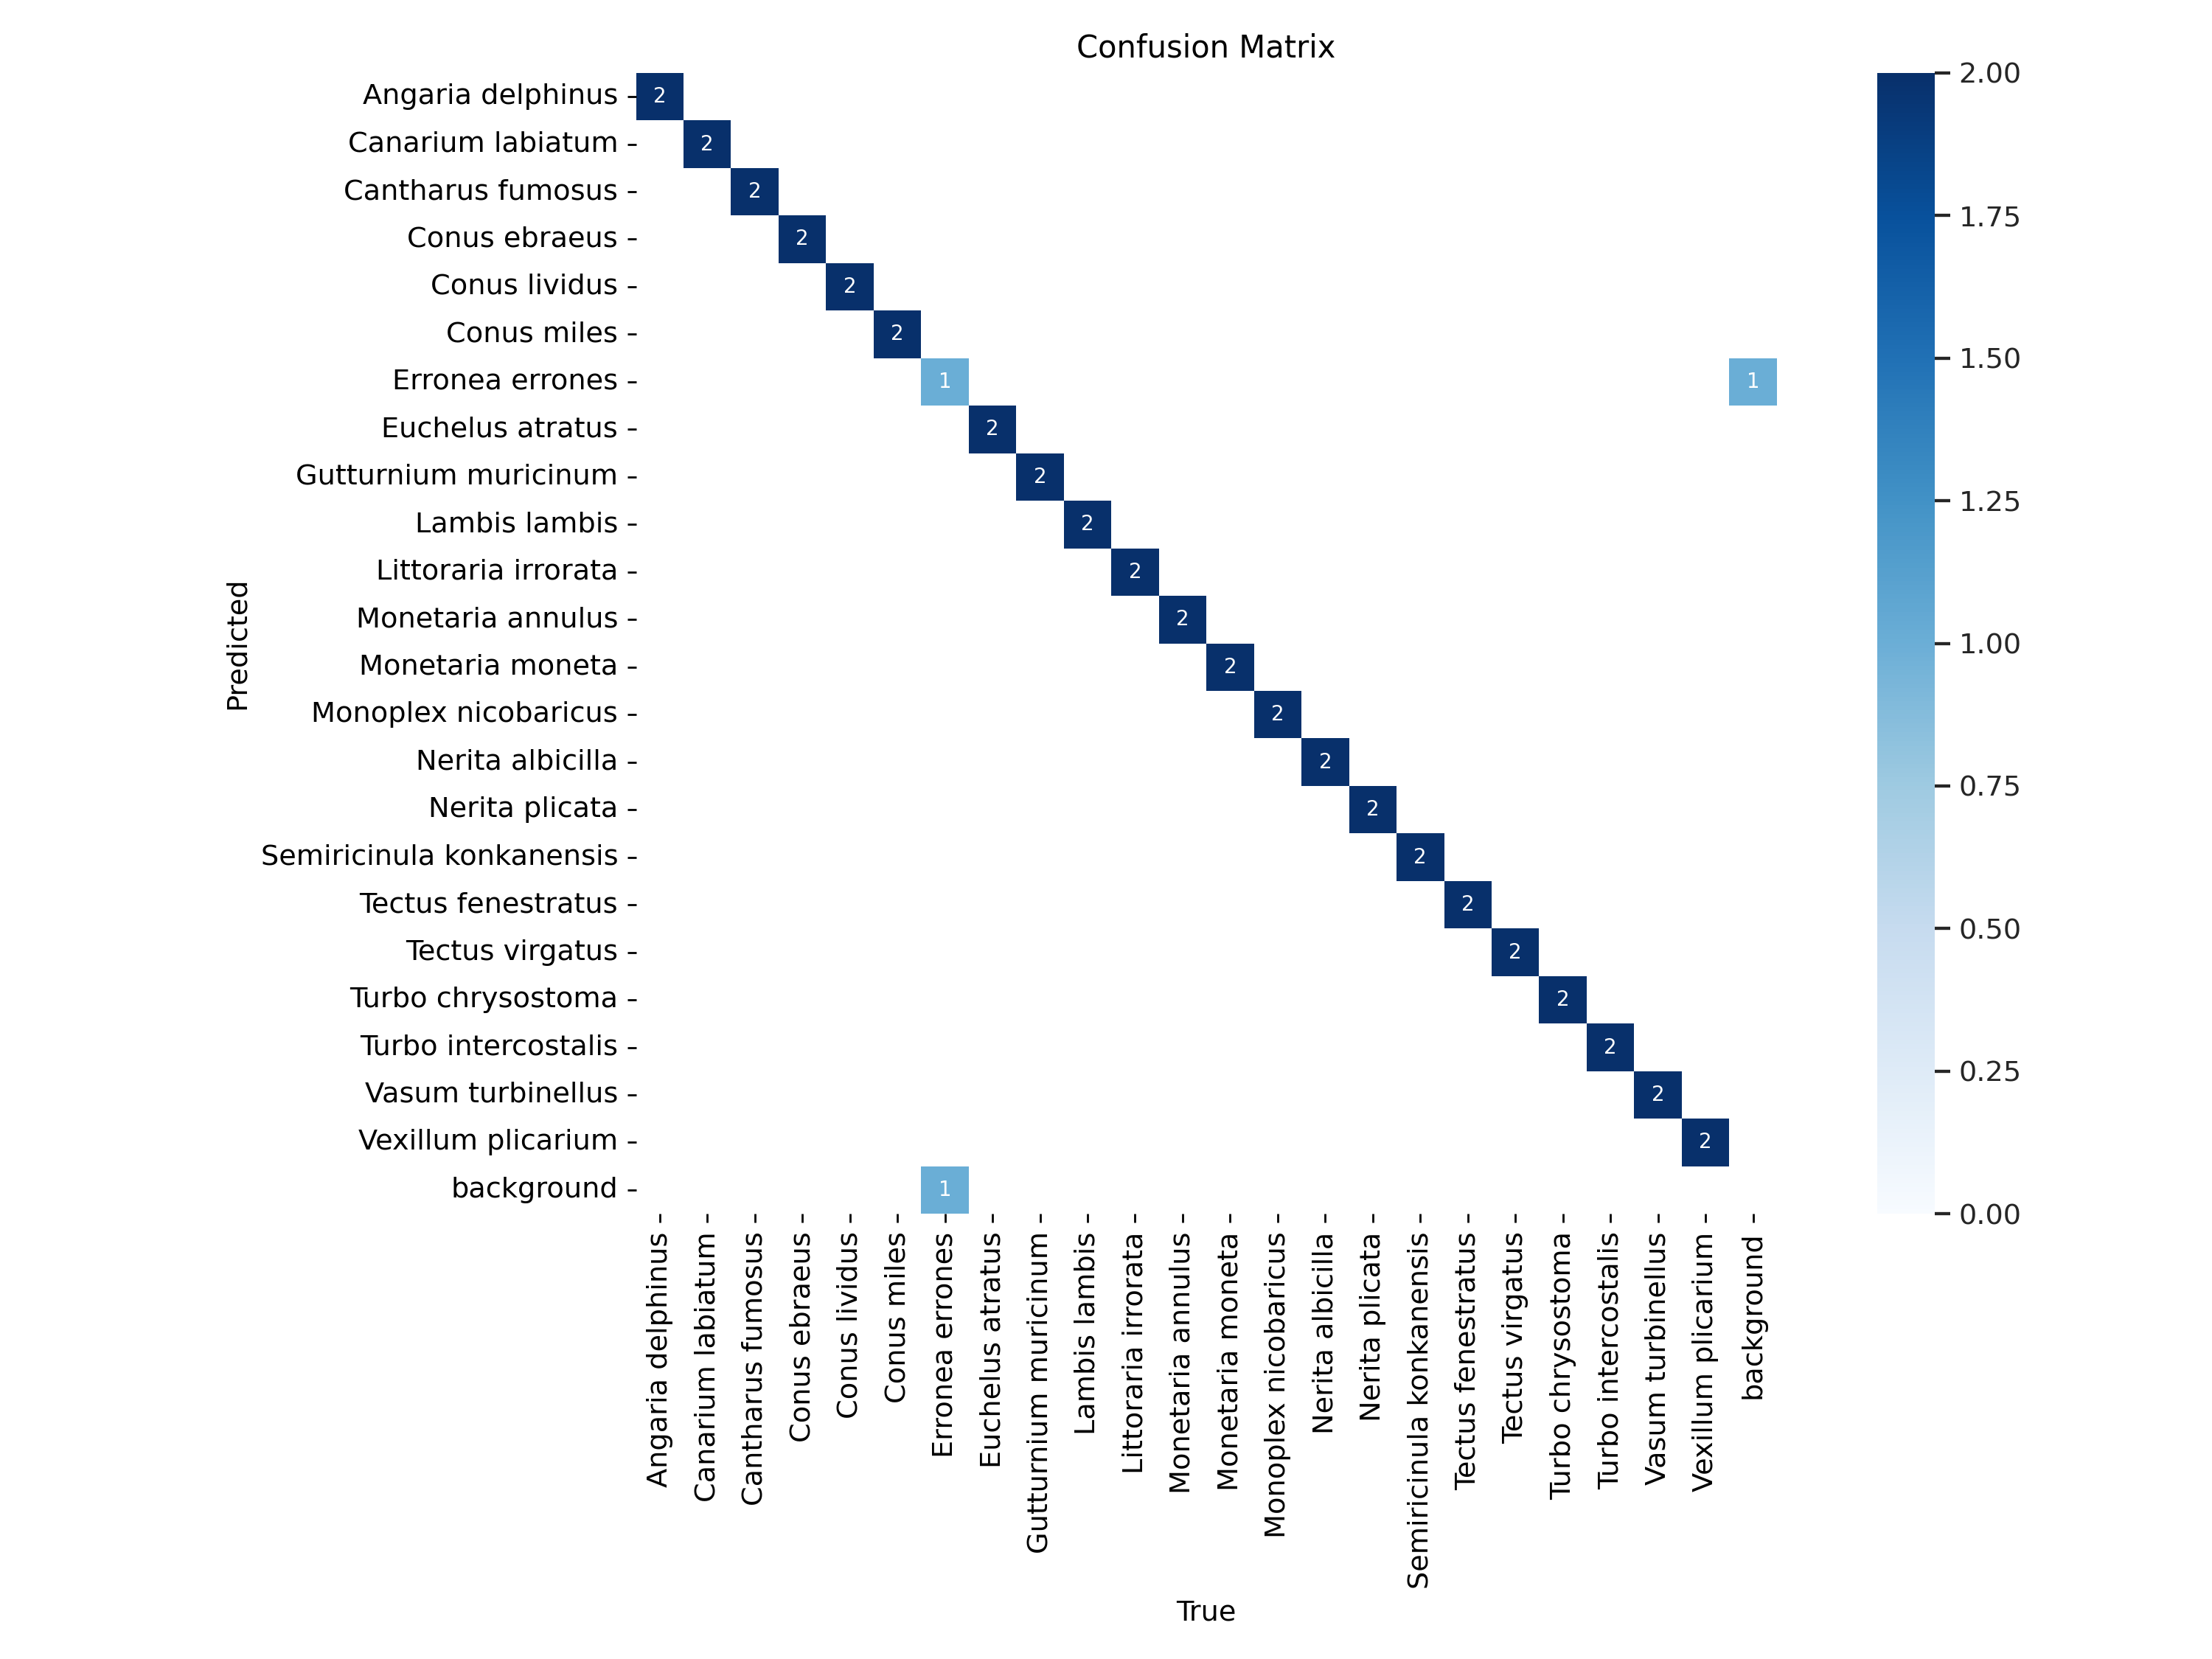

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


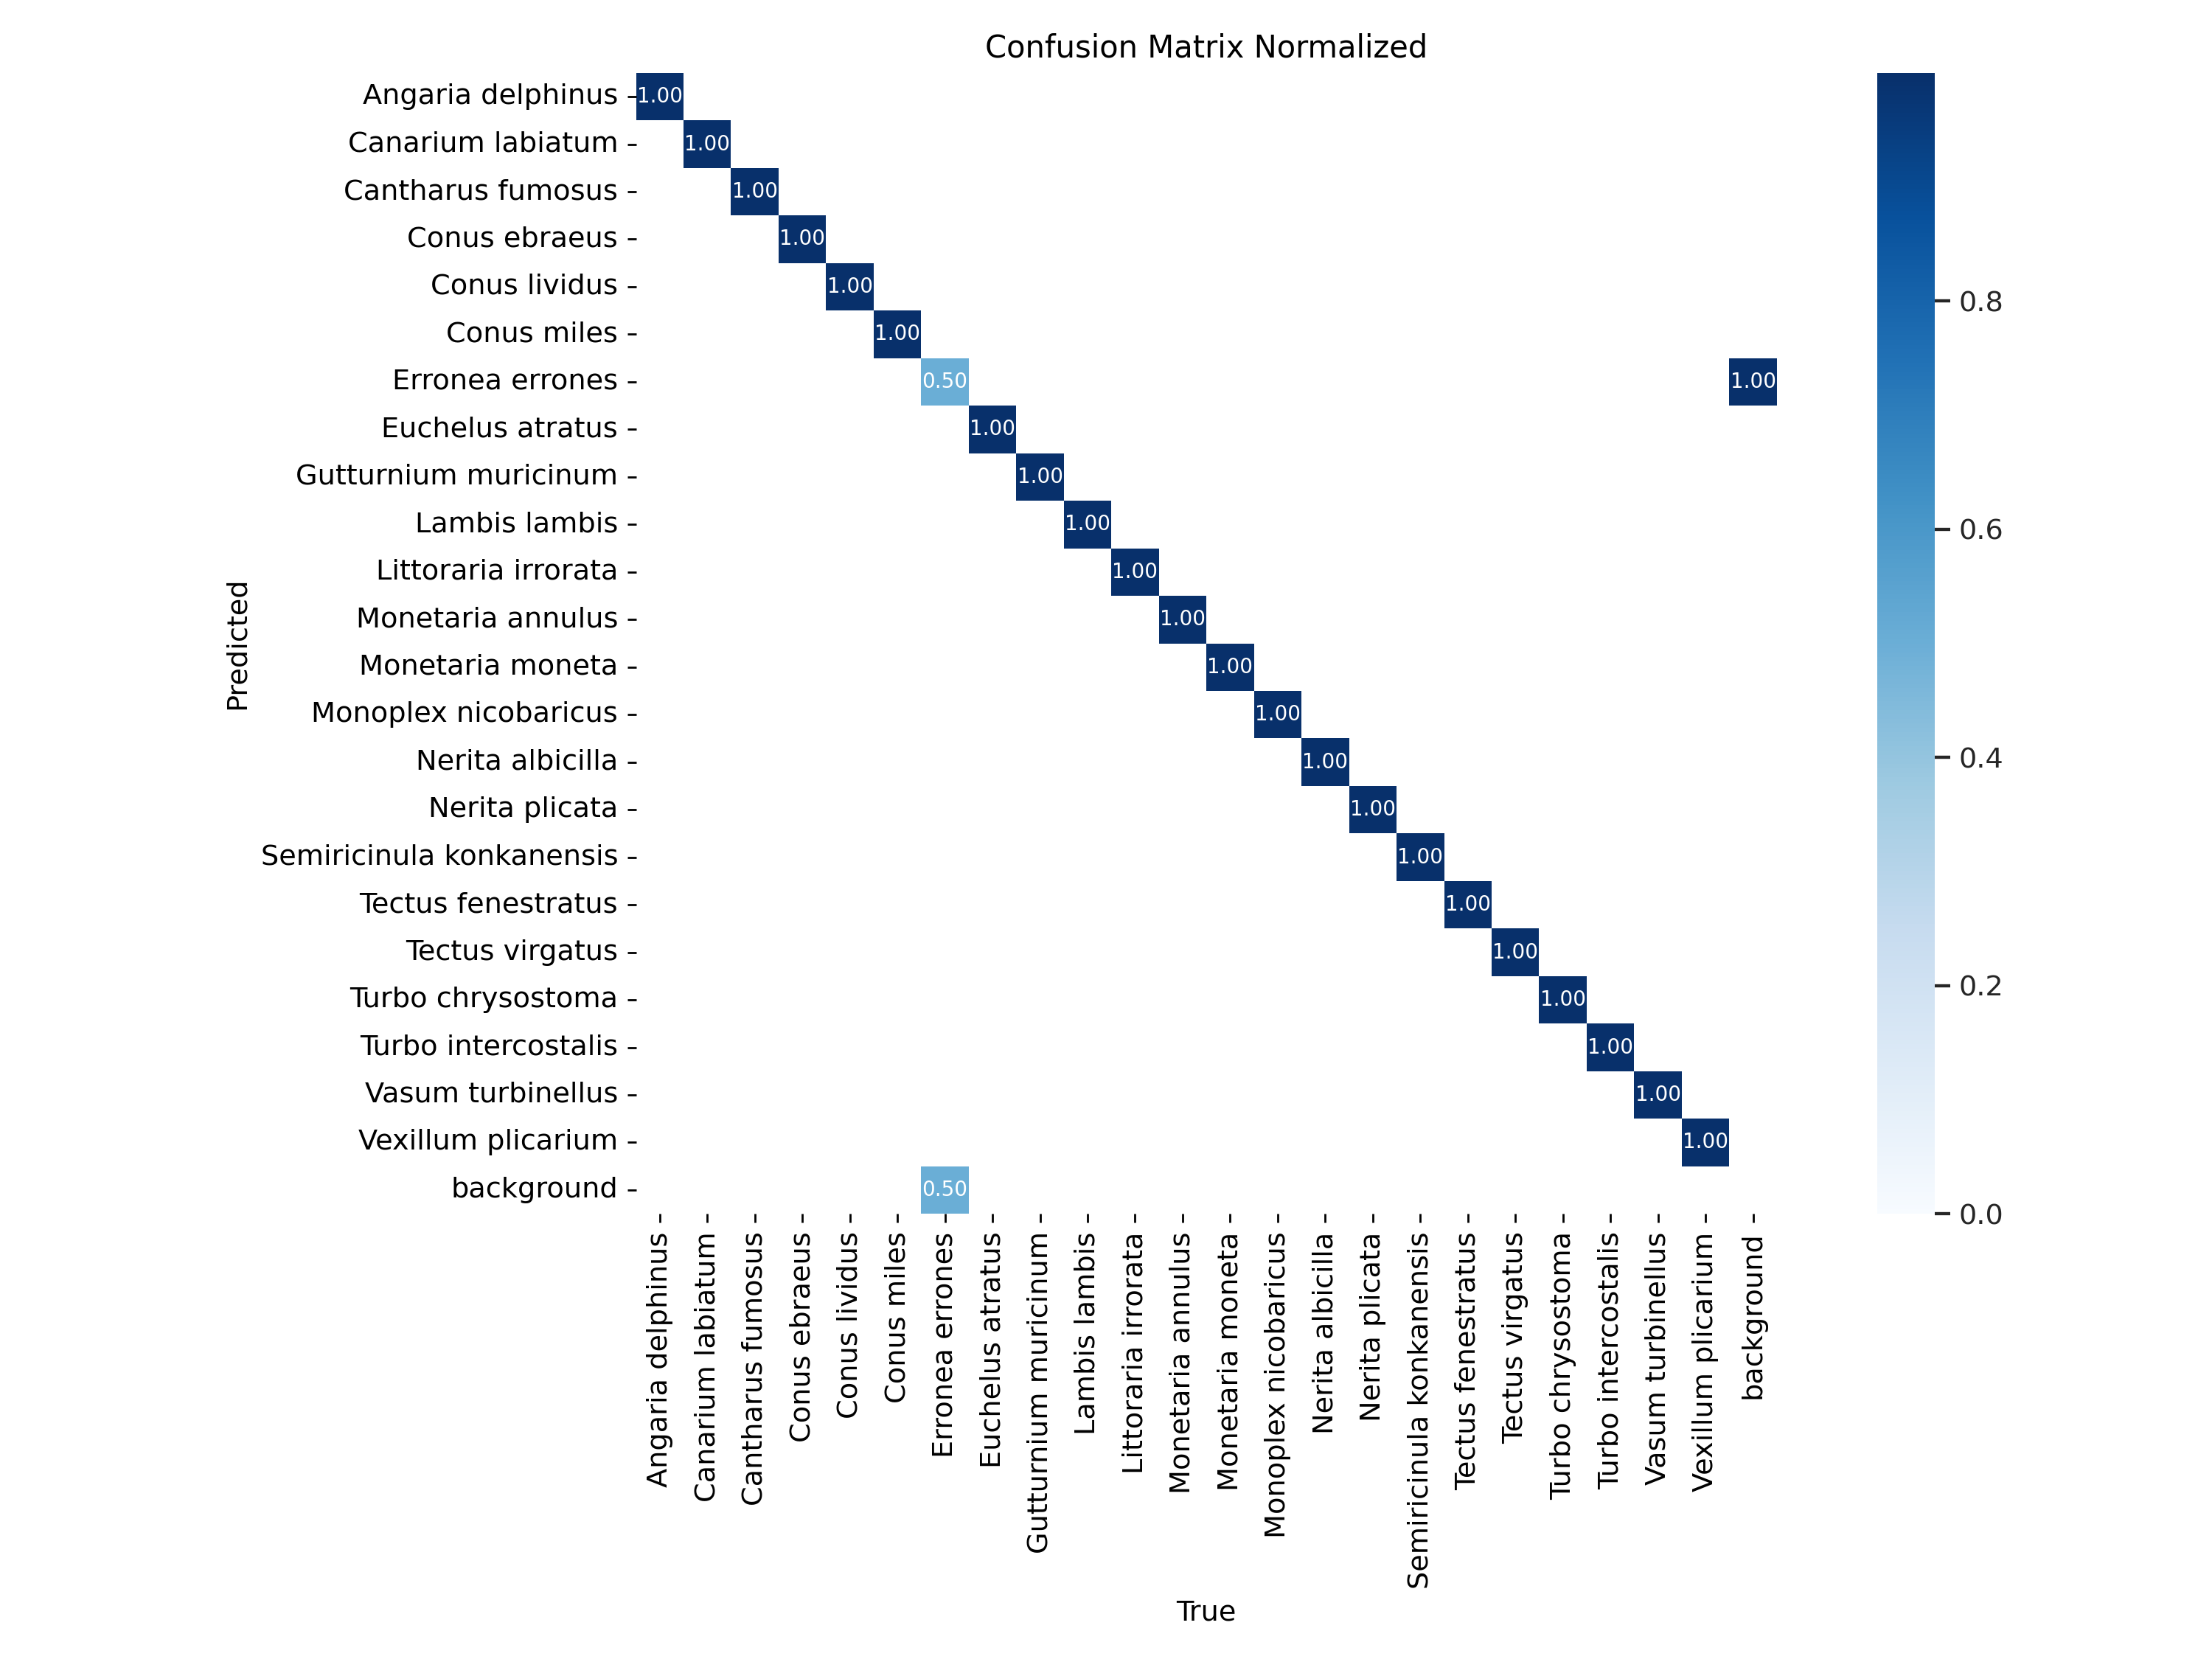

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix_normalized.png', width=600)

# **F1, P, PR, and R Curve**

**F1**

/content


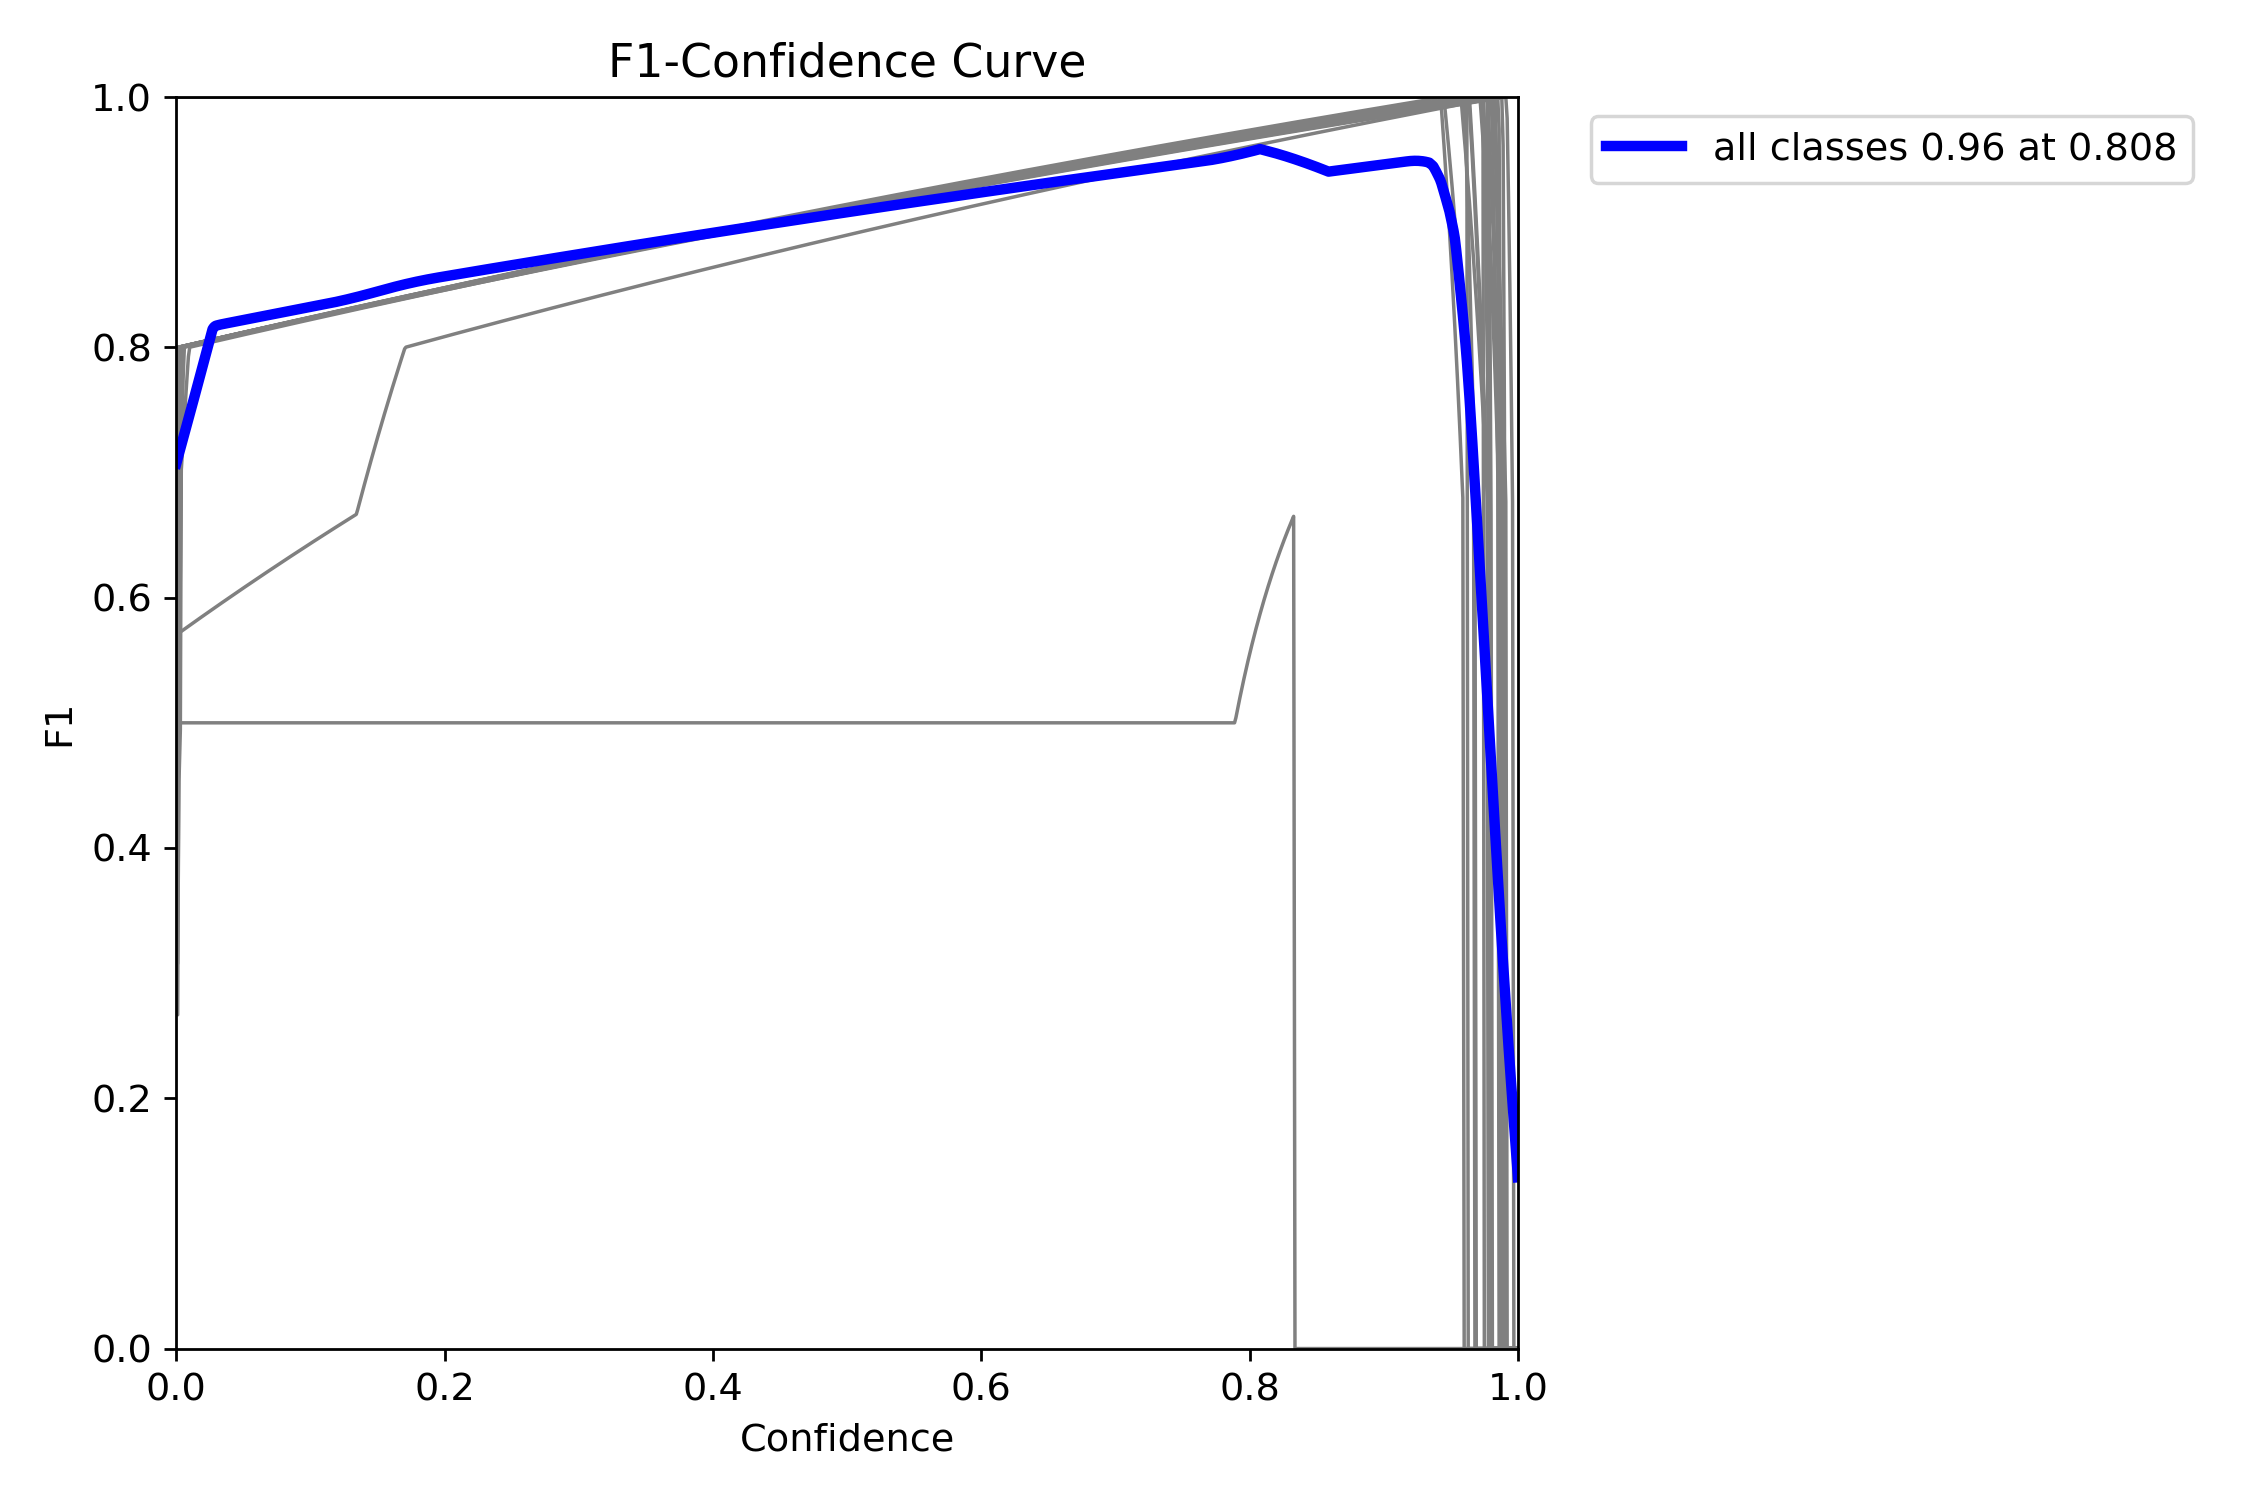

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/BoxF1_curve.png', width=600)

**P**

/content


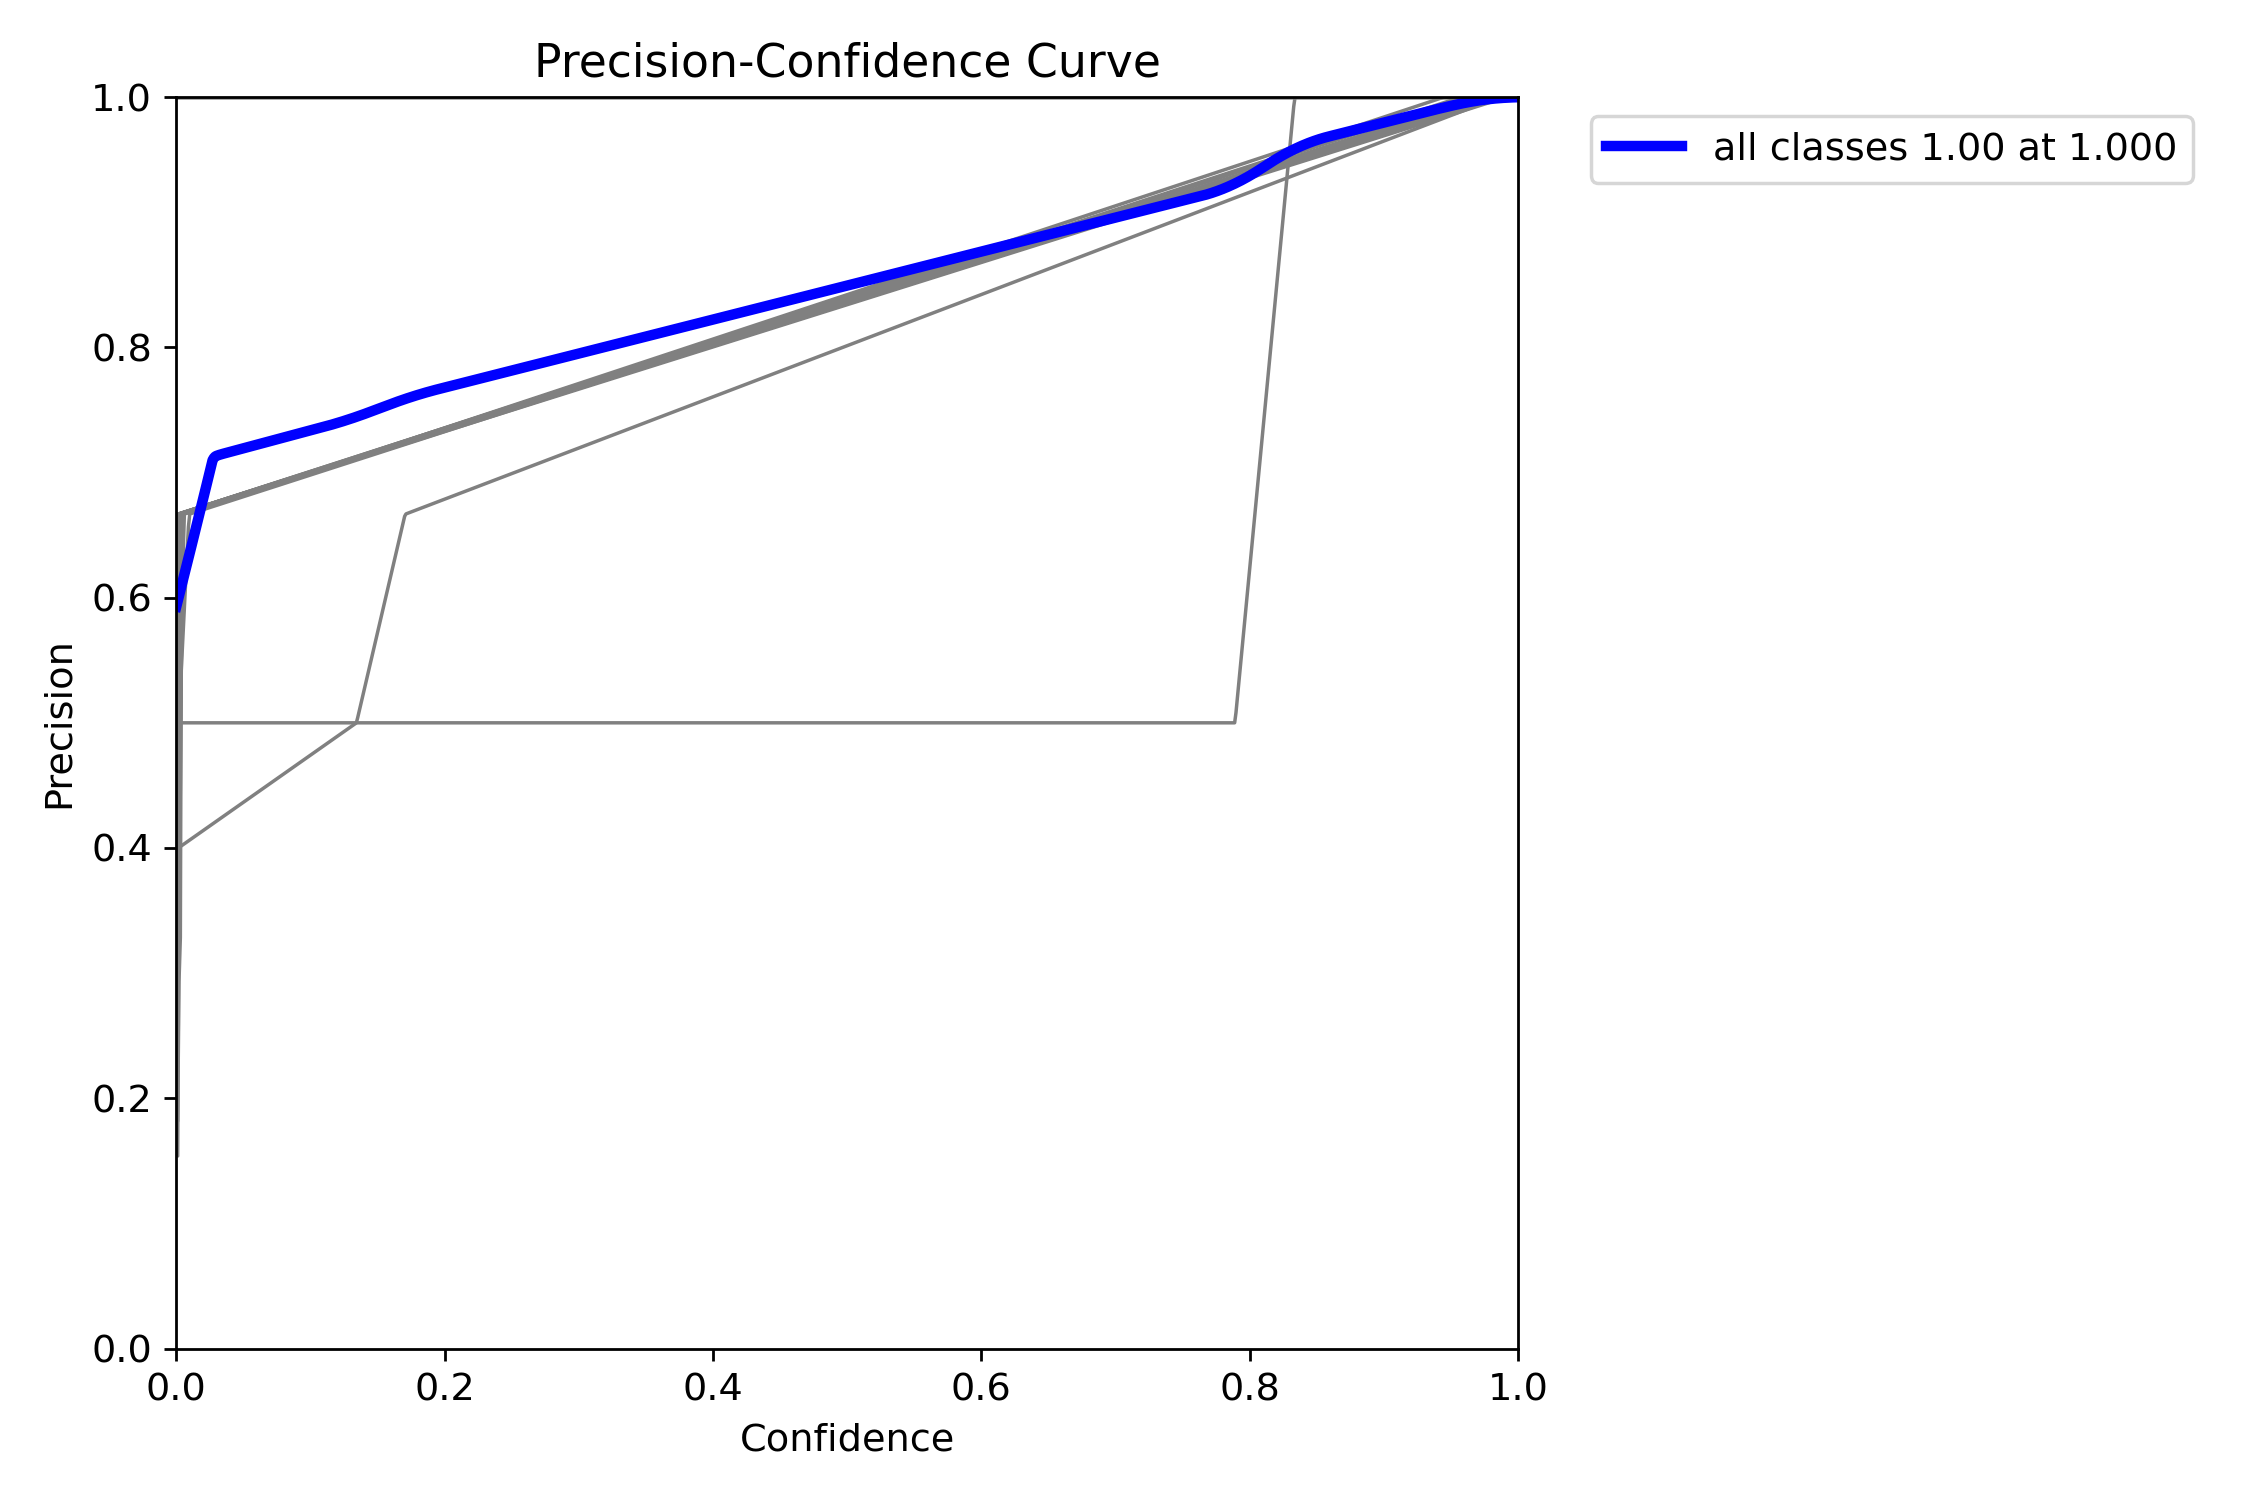

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/BoxP_curve.png', width=600)

**PR**

/content


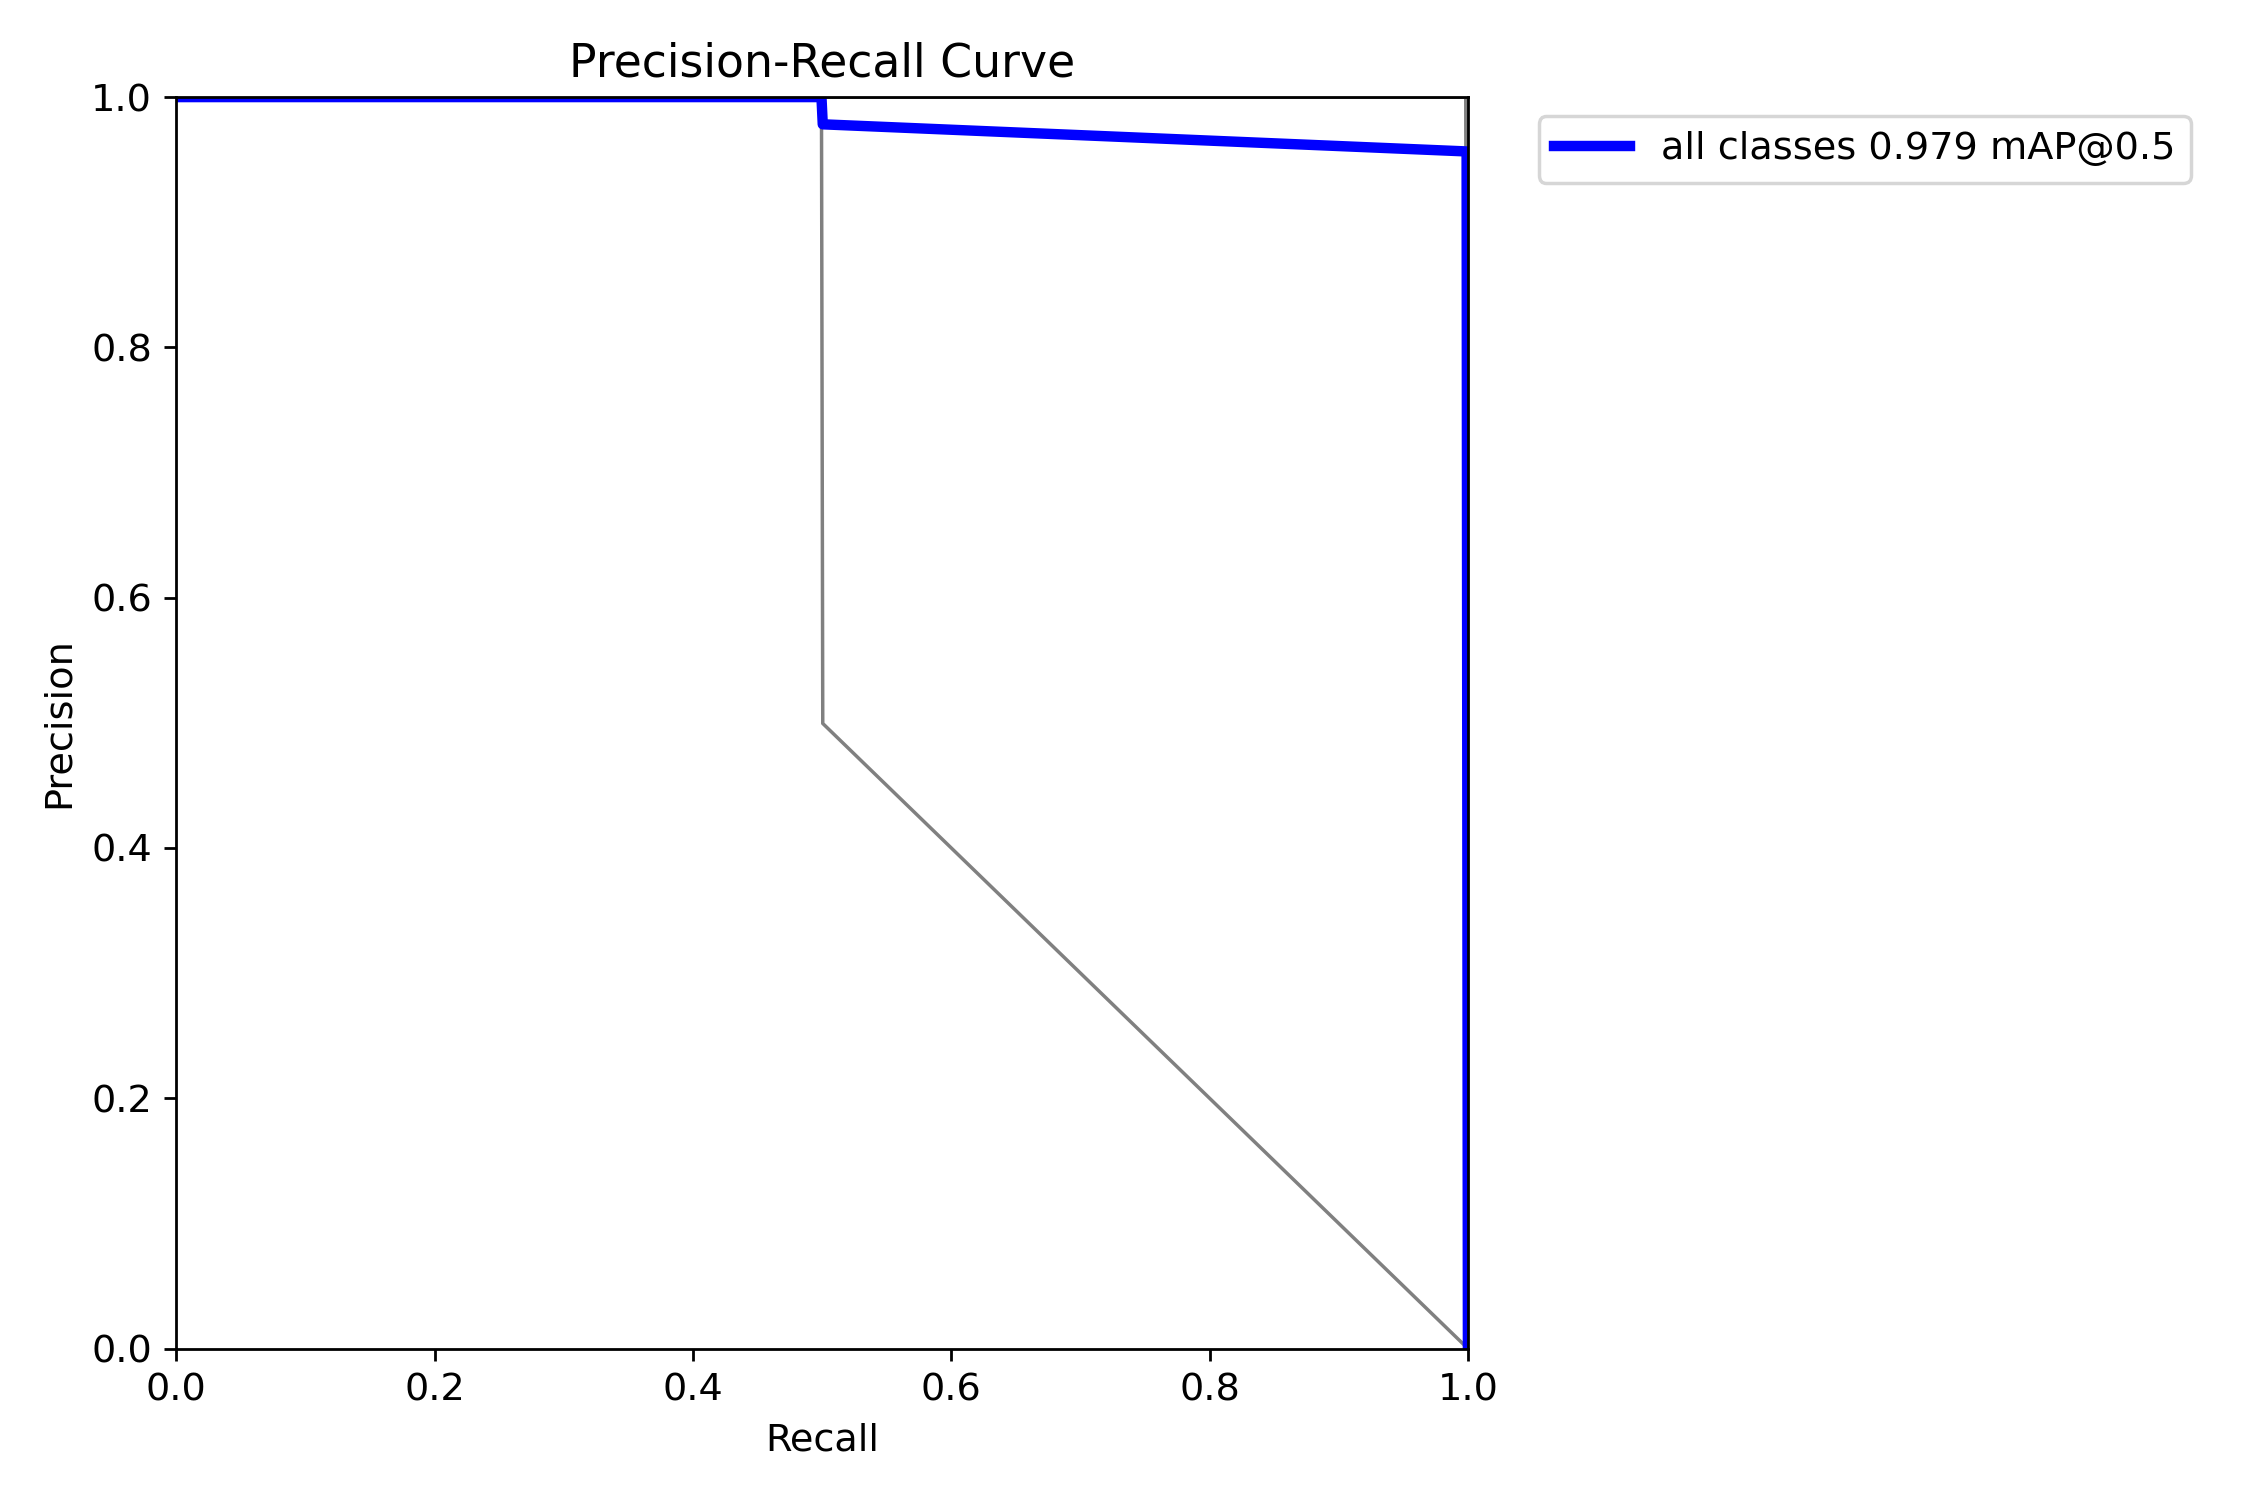

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/BoxPR_curve.png', width=600)

**R**

/content


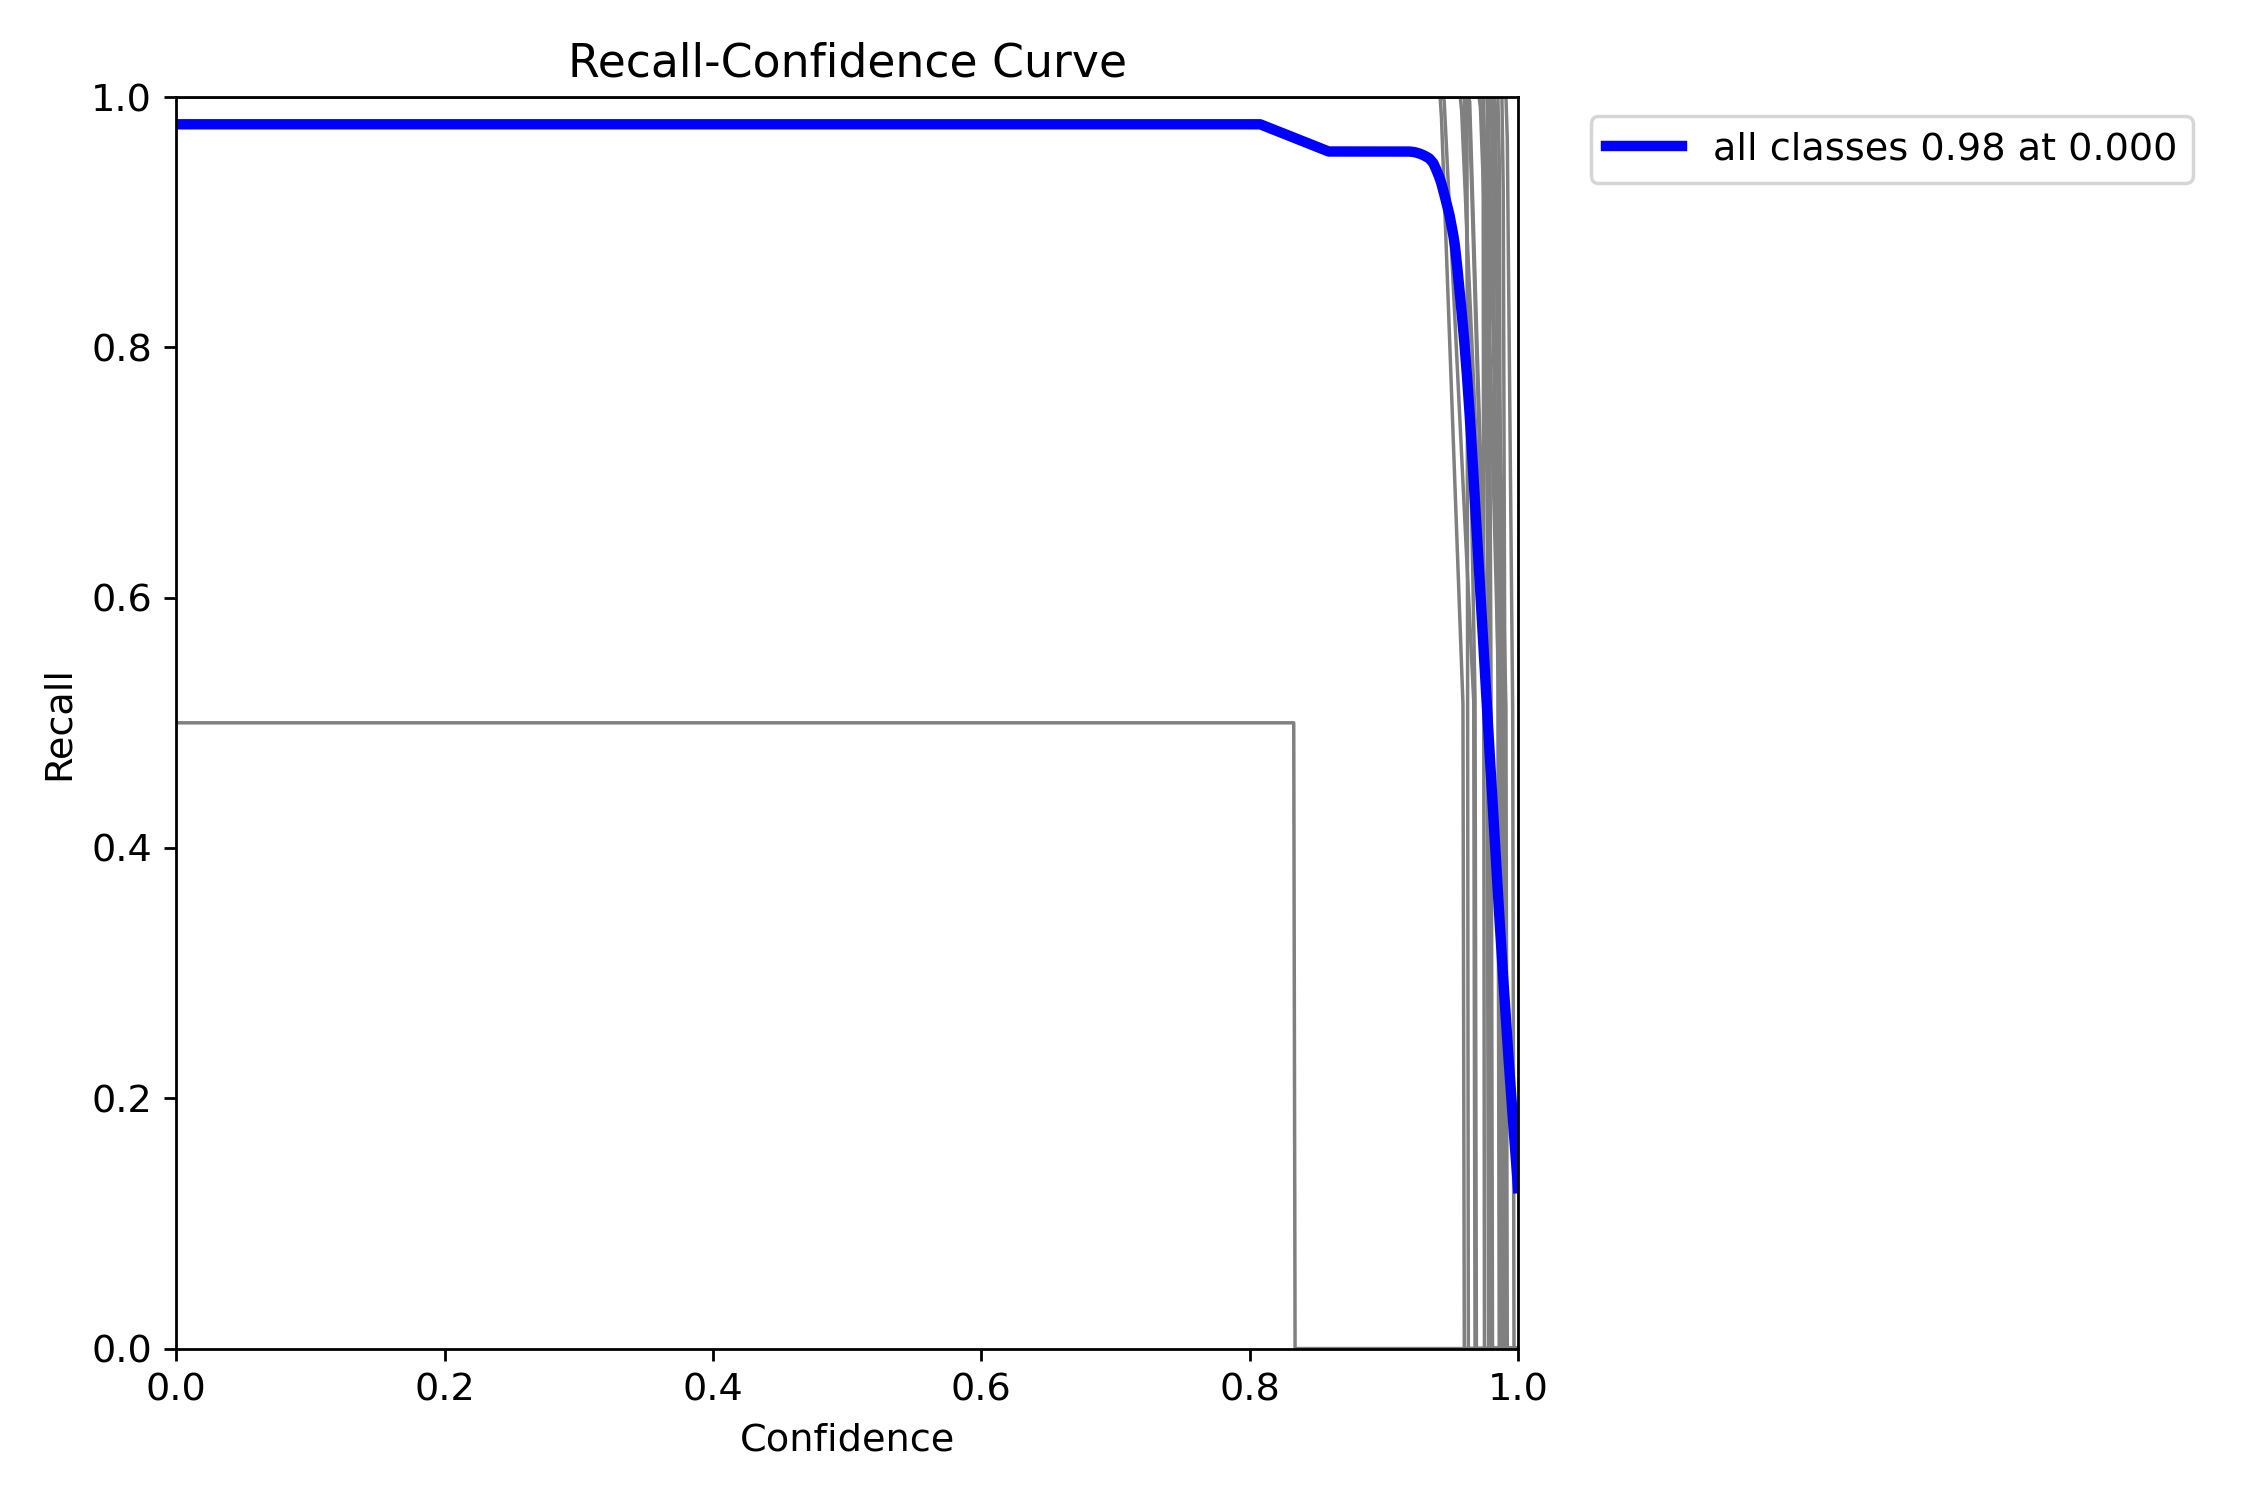

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/BoxR_curve.png', width=600)

# **Labels**

/content


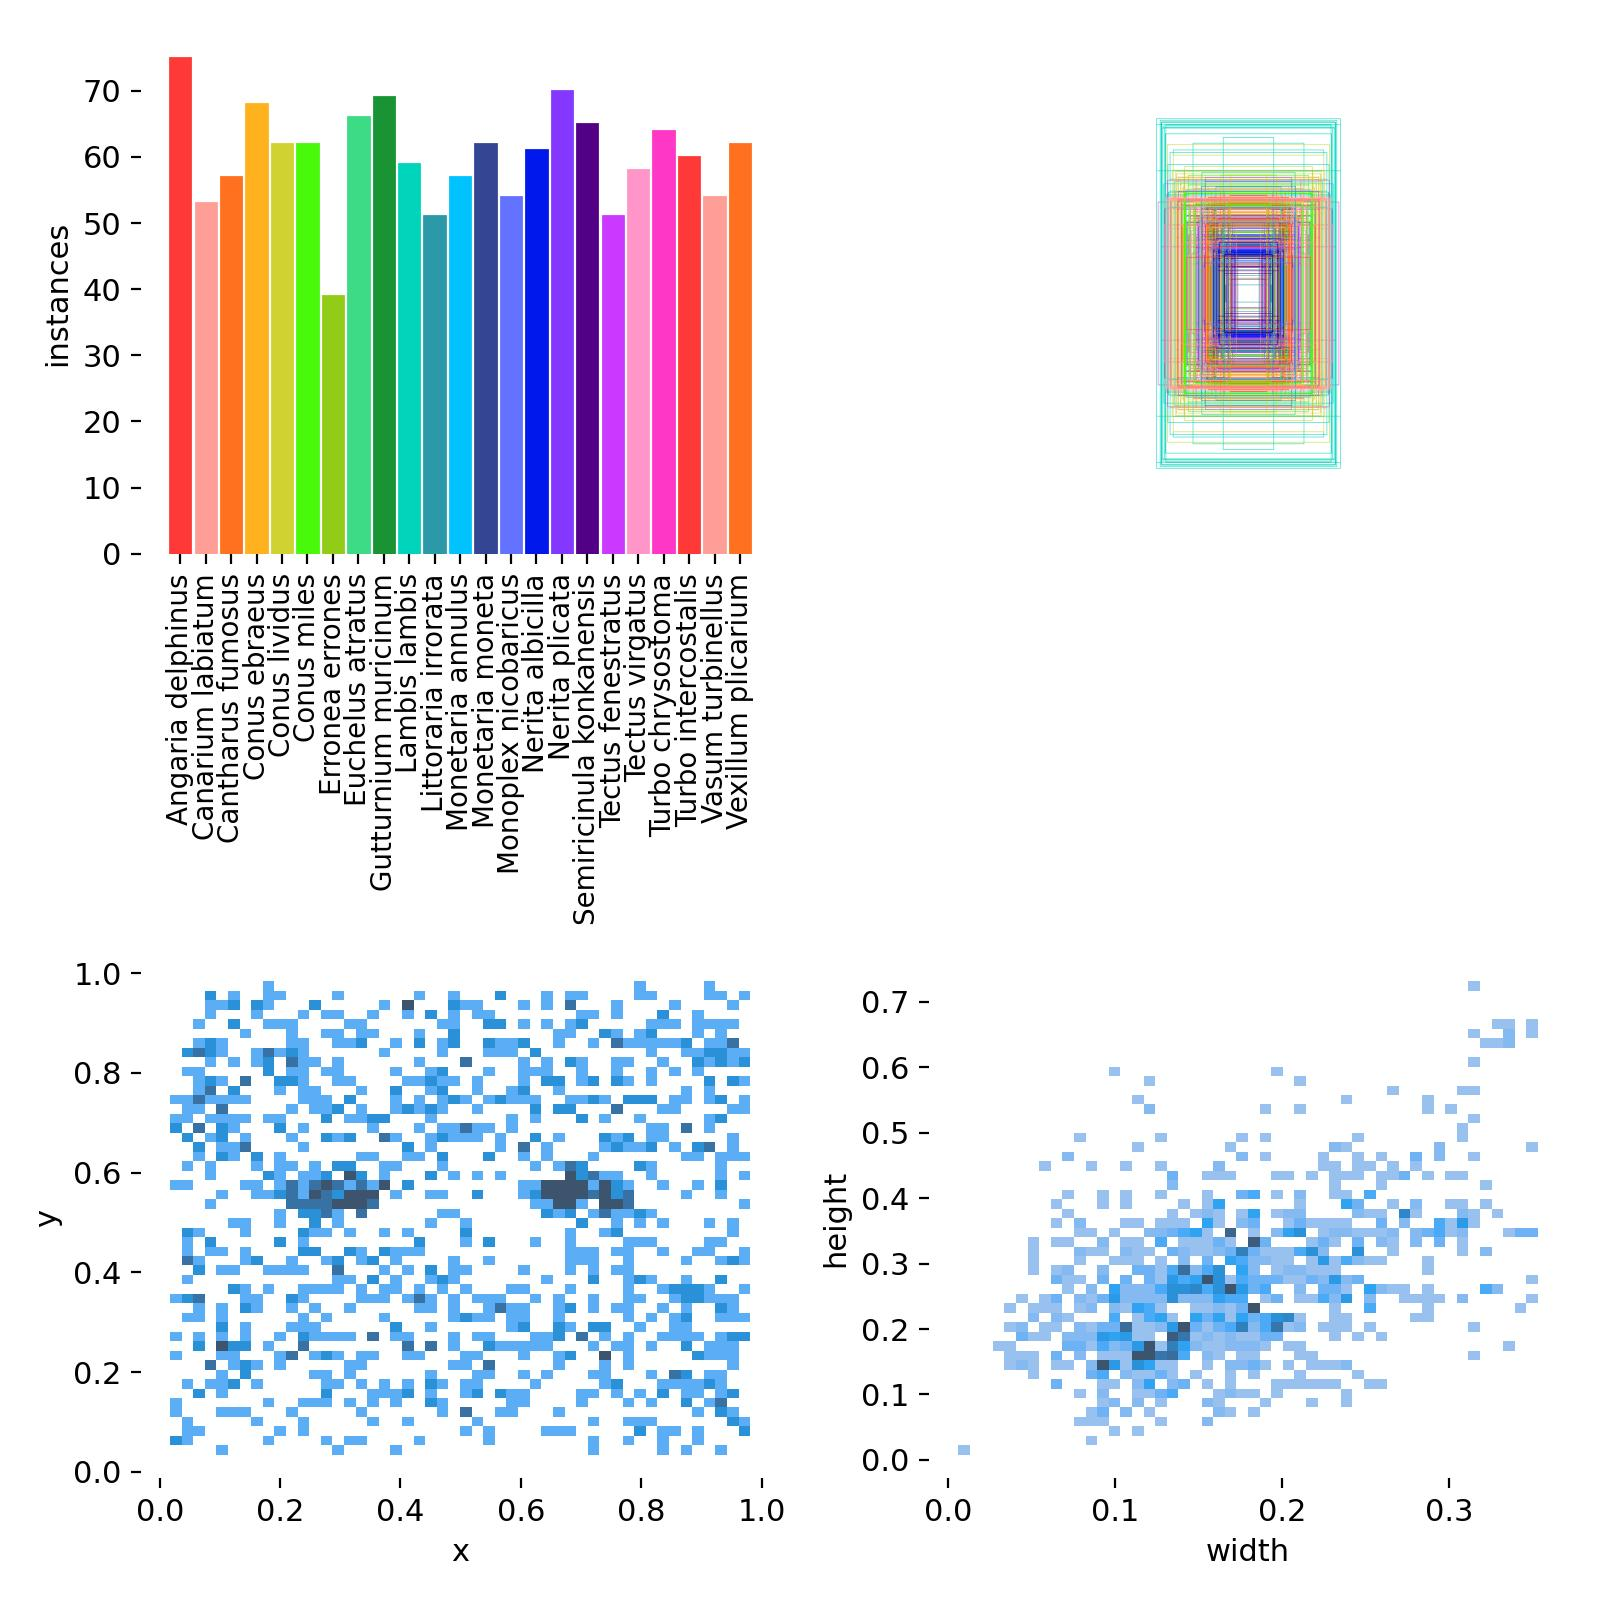

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/labels.jpg', width=600)

**Labels Correlogram**

/content


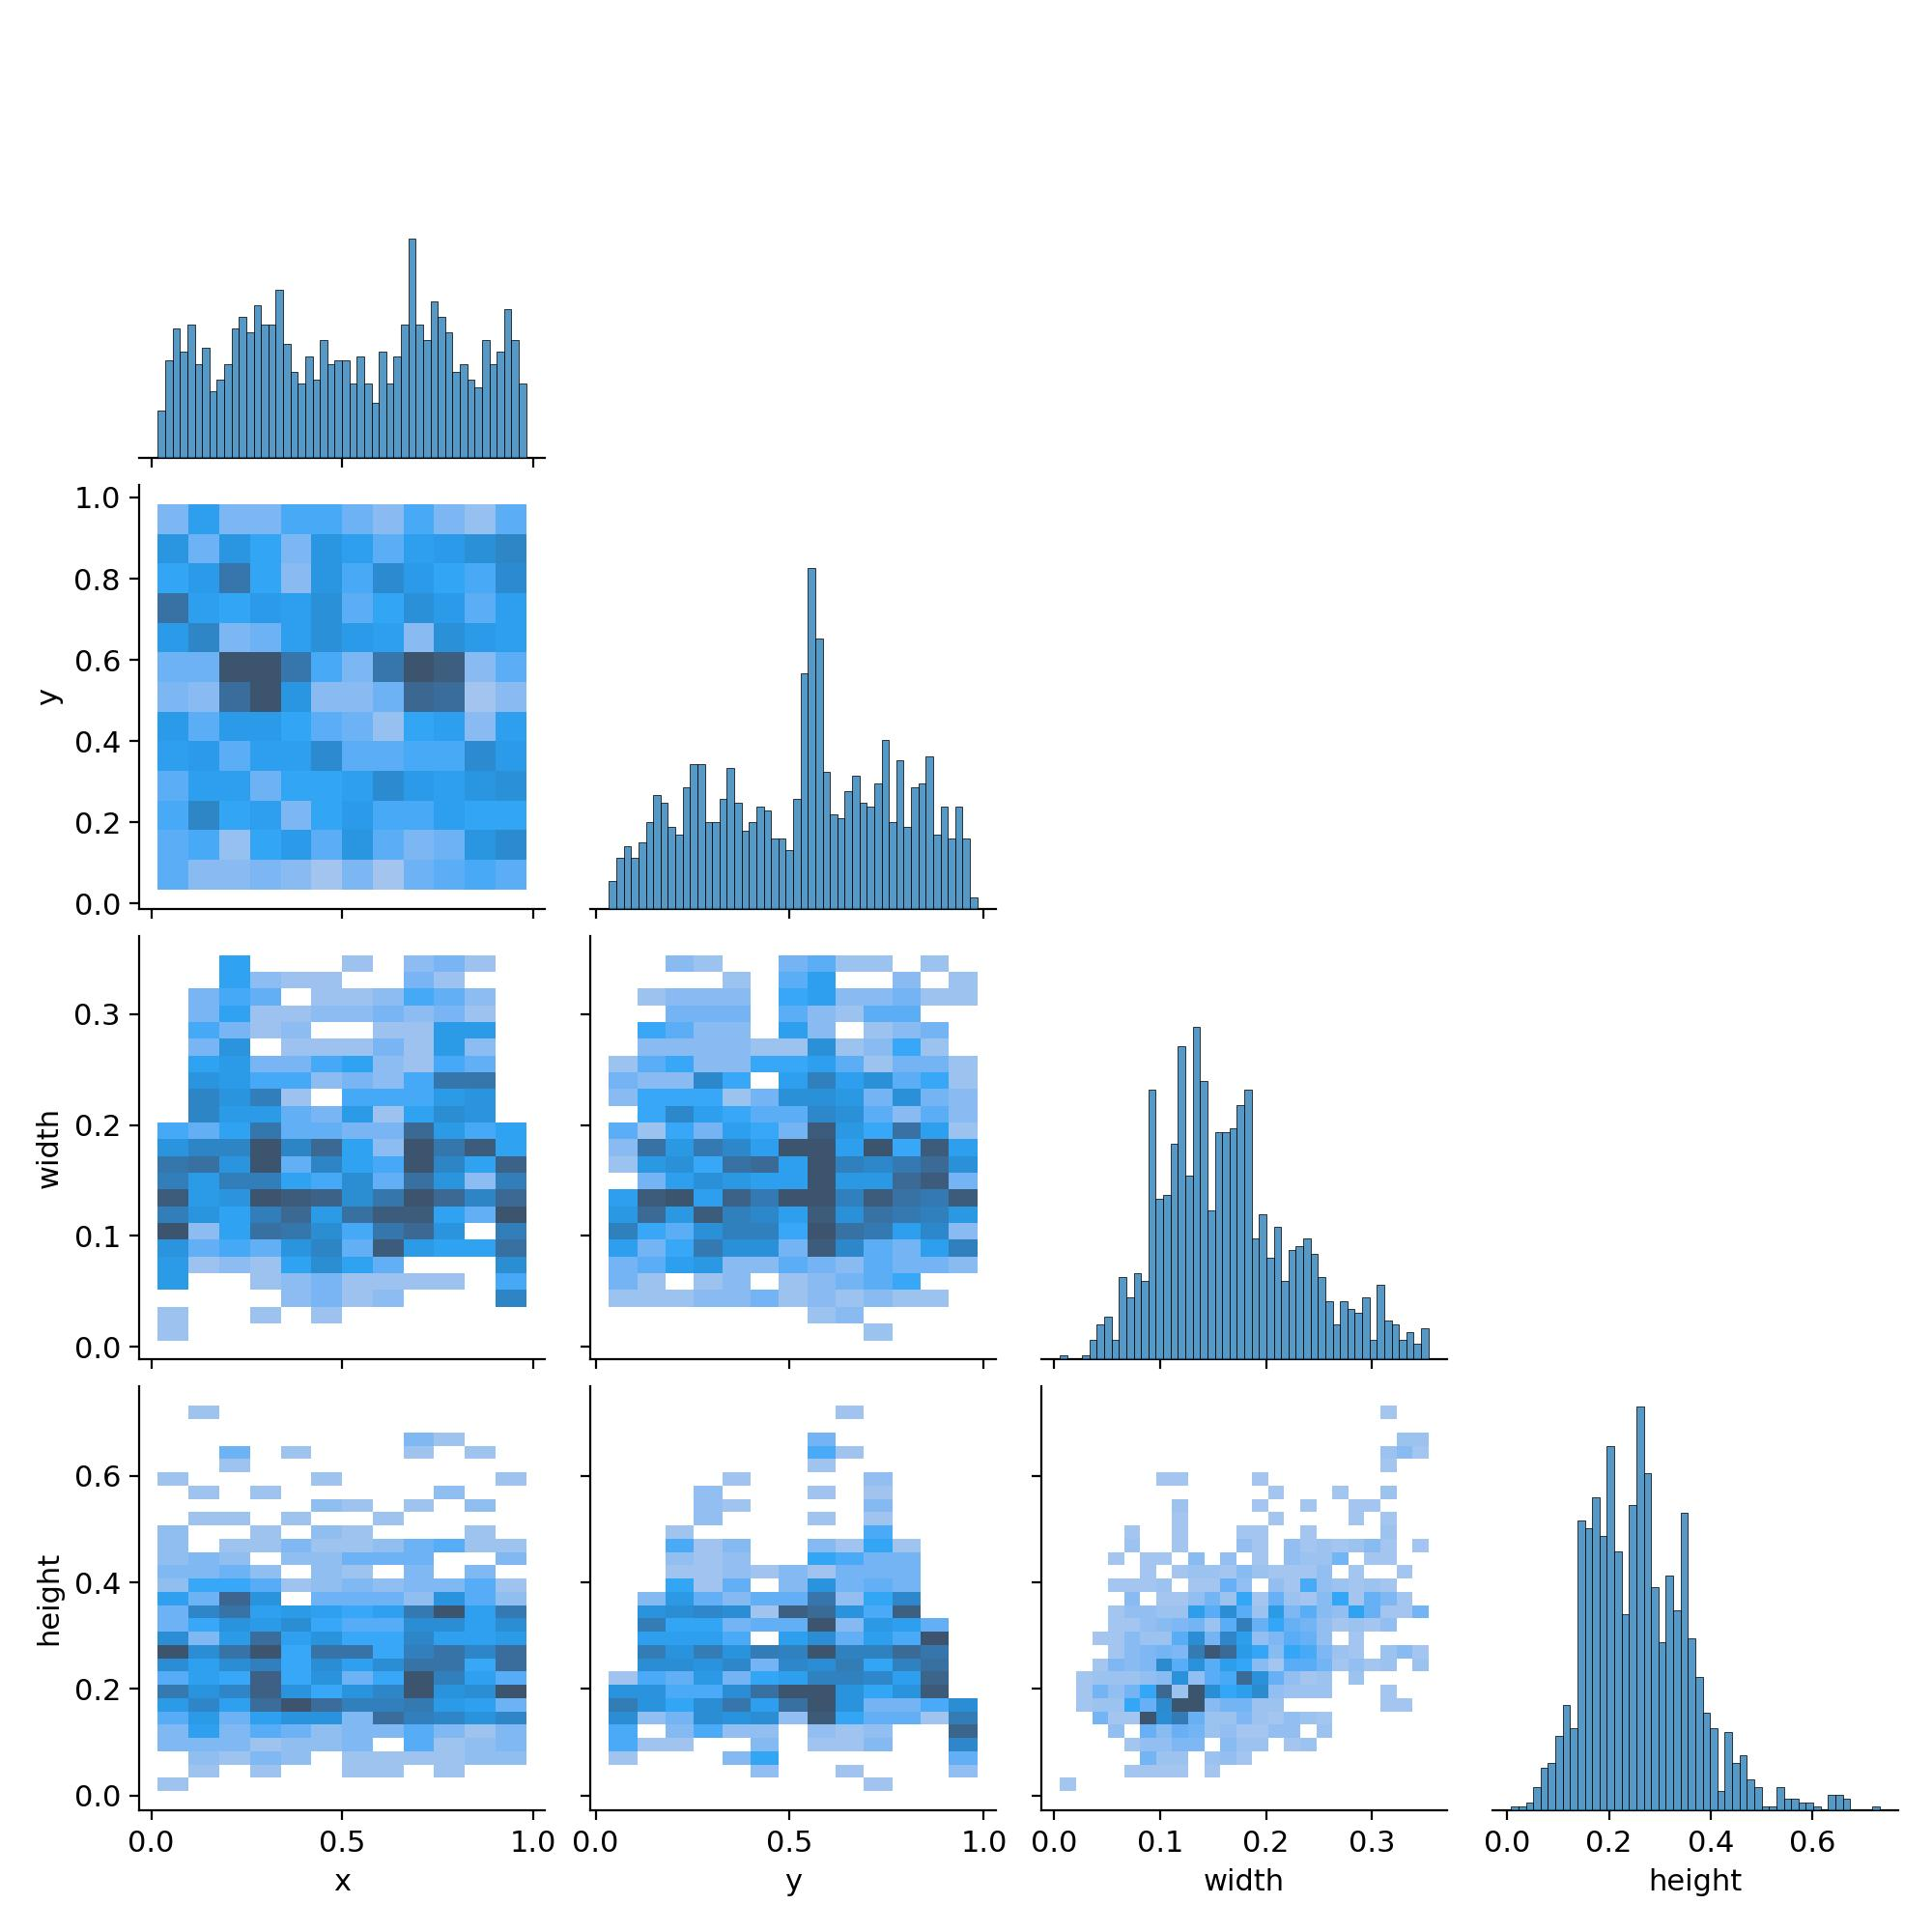

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/labels_correlogram.jpg', width=600)

# **Results**

/content


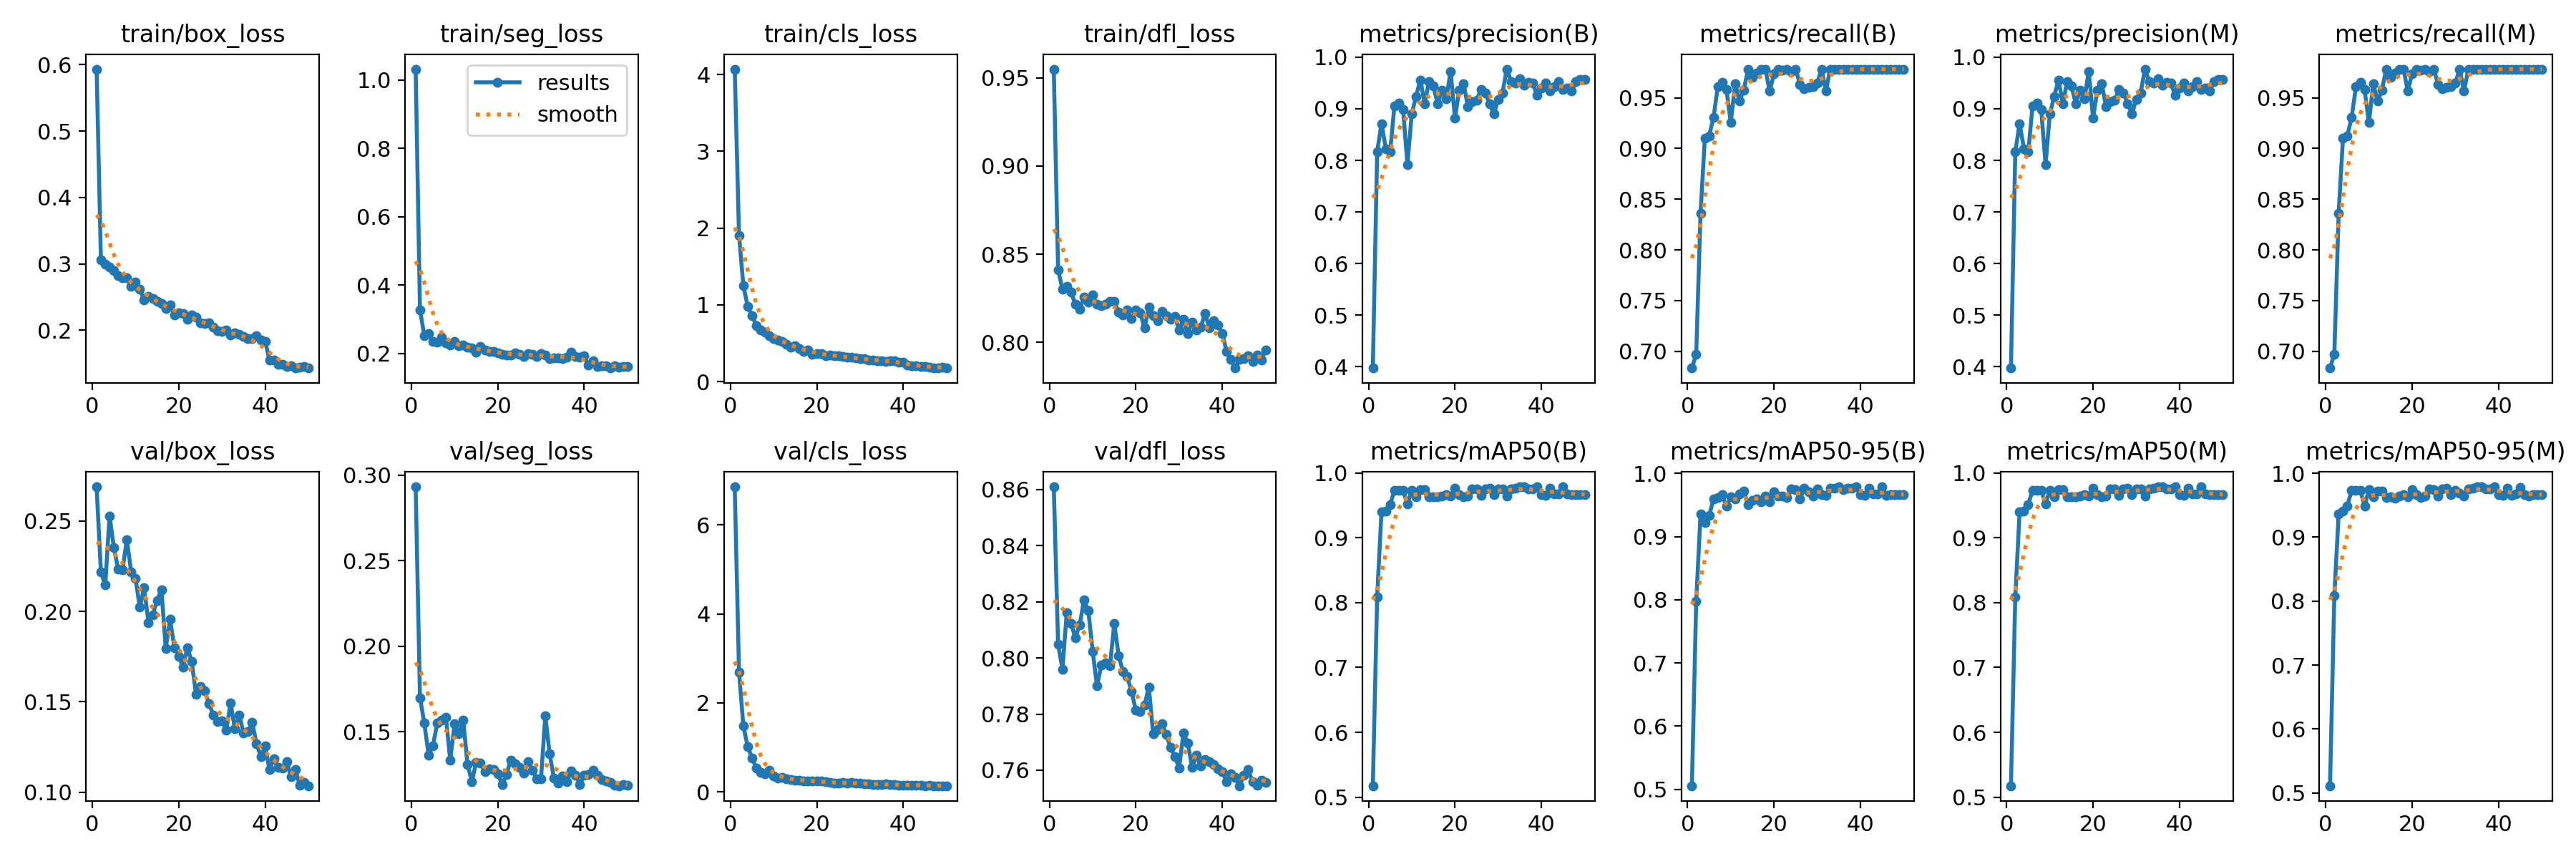

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

# **Validation**

/content


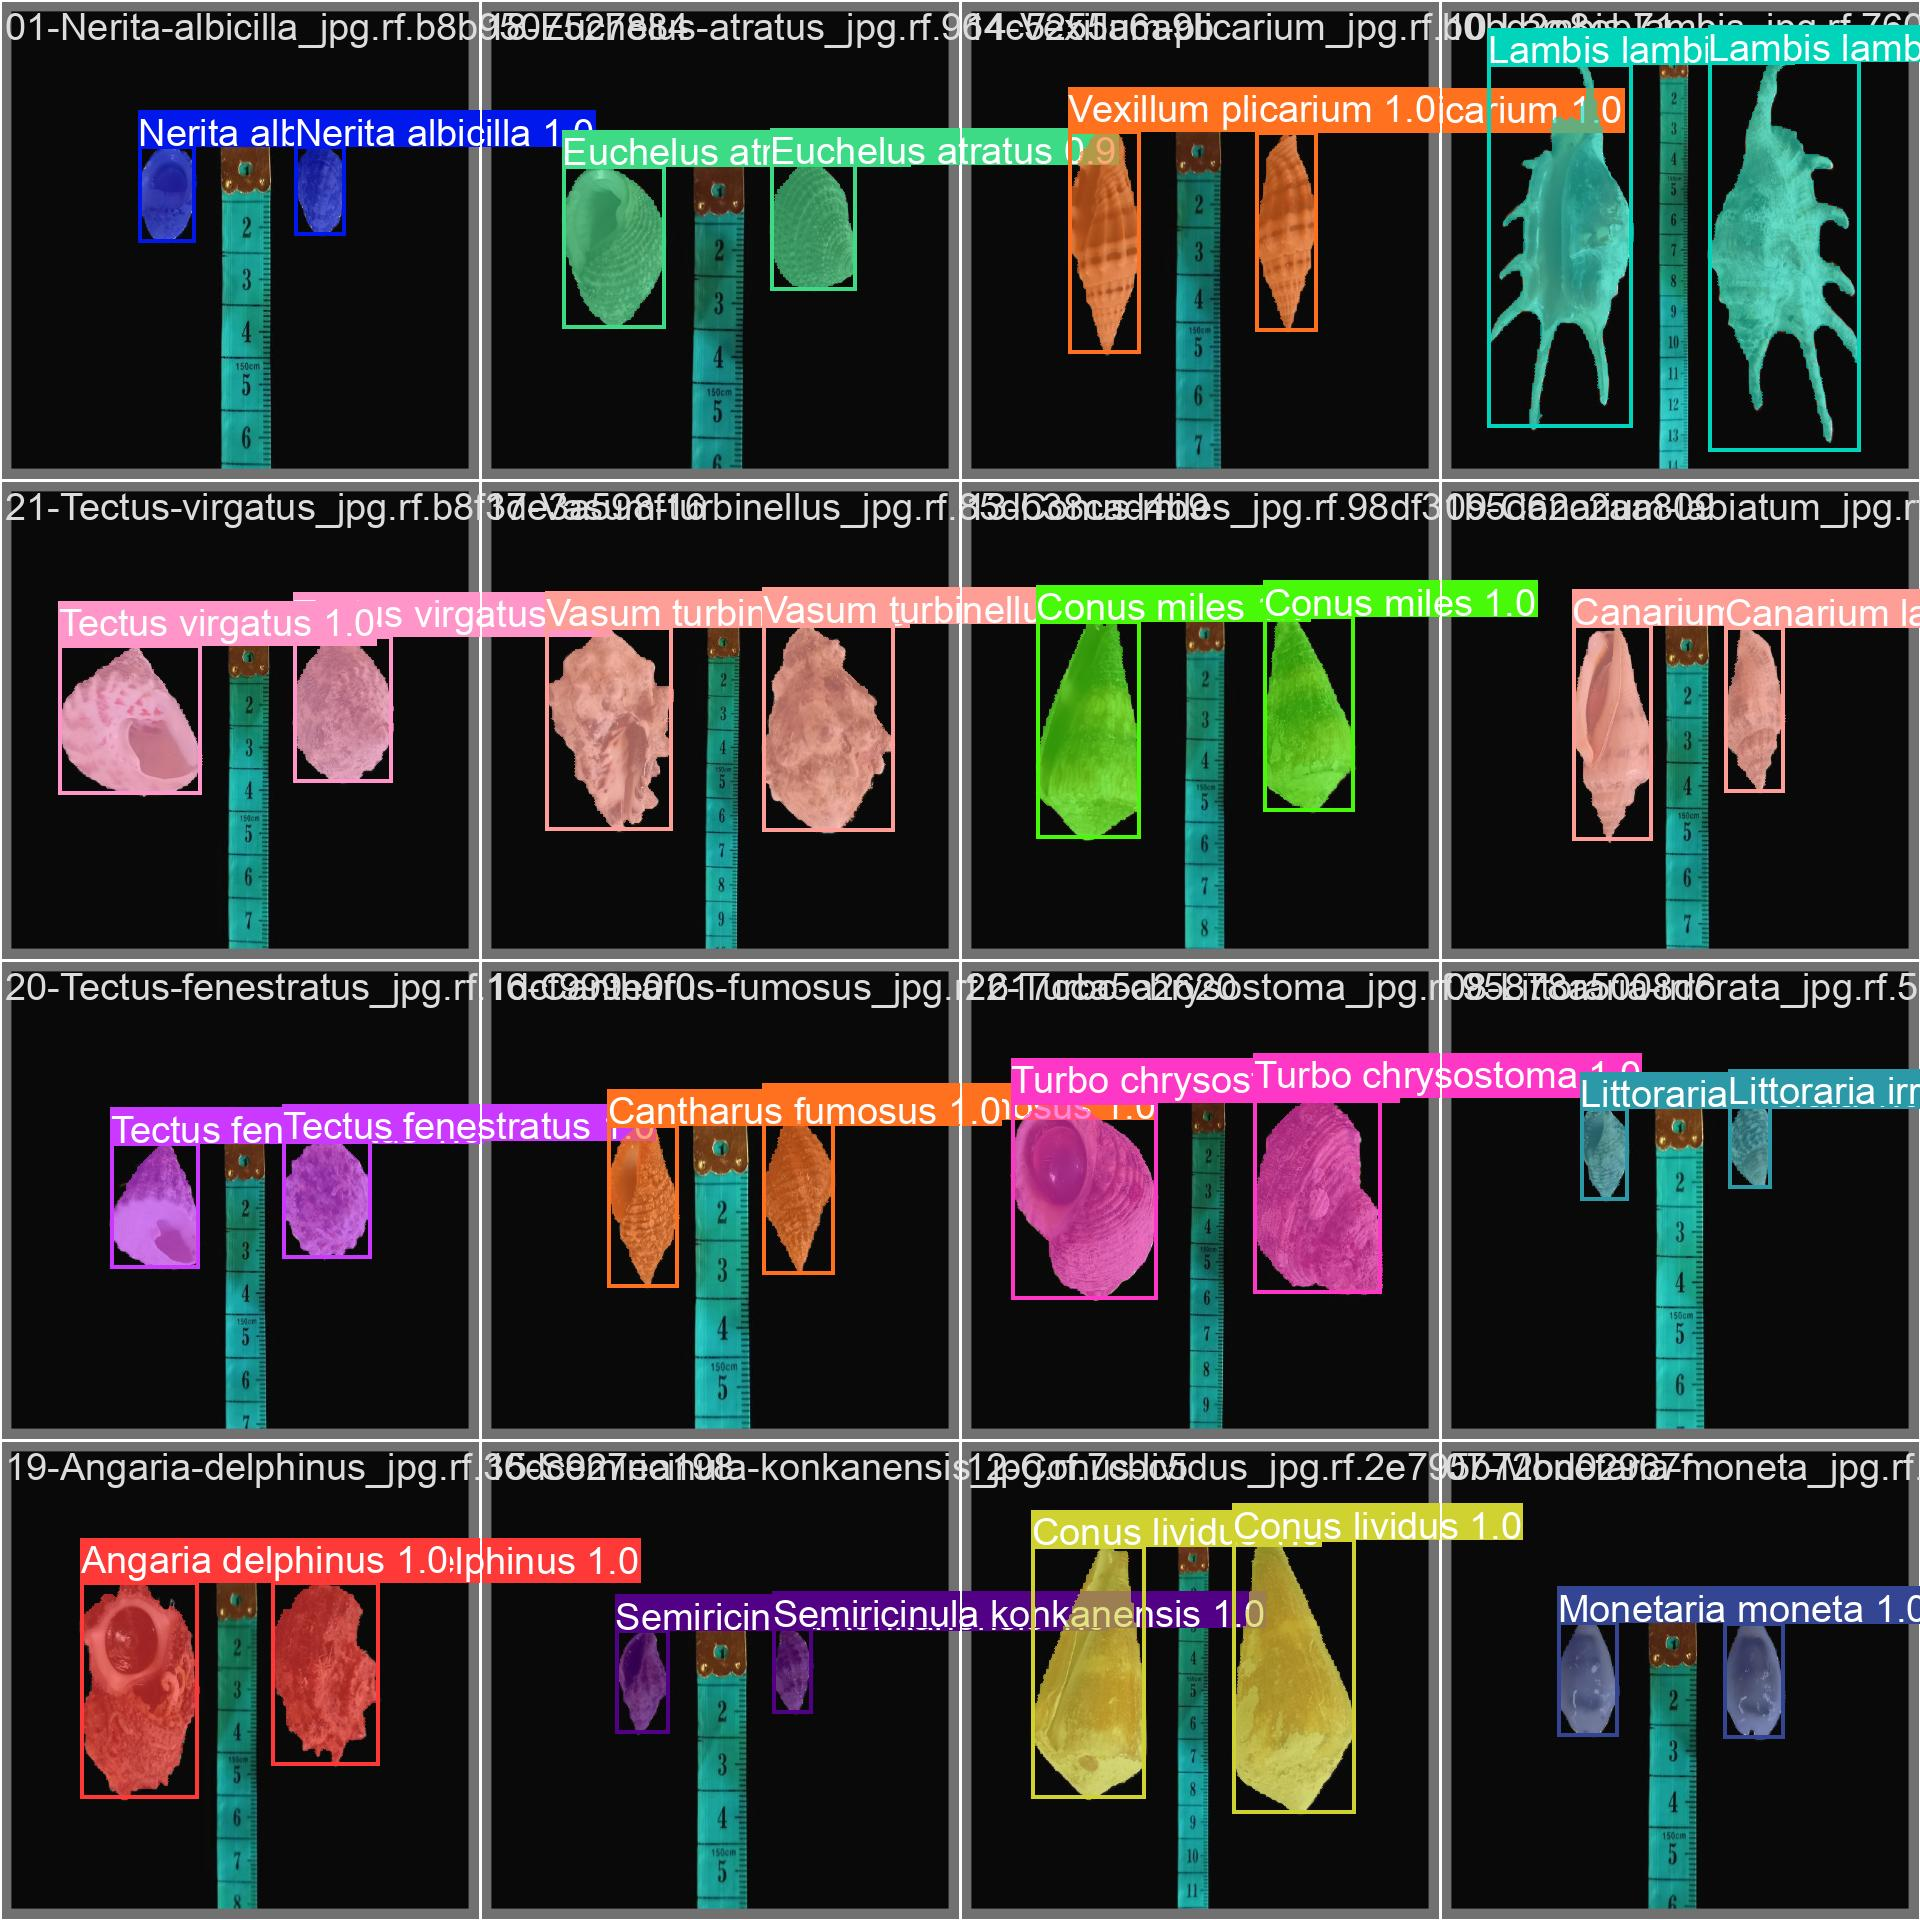

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [18]:
#%cd {HOME}
#Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [19]:
#%cd {HOME}
#Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

# **Validate Gastropod Detection & Classification Model**

In [20]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11788501 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/species-det-8/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.17it/s]
                   all         23         46      0.926      0.978      0.979      0.979      0.926      0.978      0.979      0.979
     Angaria delphinus         23          2      0.917          1      0.995      0.995      0.917          1      0.995      0.995
     Canarium labiatum         23          2      0.939          1      0.995      0.995      0.939          1      0.995      0.995
     Cantharus fumosus         23          2      0.934          1      0.995      0.995      0.934          1      

**Inference with Gastropod Detection & Classification Model**

In [21]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11788501 parameters, 0 gradients, 42.5 GFLOPs

image 1/23 /content/datasets/species-det-8/valid/images/01-Nerita-albicilla_jpg.rf.b8b9507527884645bcdab165604b36d8.jpg: 640x640 2 Nerita albicillas, 21.0ms
image 2/23 /content/datasets/species-det-8/valid/images/02-Nerita-plicata_jpg.rf.e2bd8c9fe86e711d505e7bc7dcb08702.jpg: 640x640 2 Nerita plicatas, 21.1ms
image 3/23 /content/datasets/species-det-8/valid/images/03-Gutturnium-muricinum_jpg.rf.4e15945e12ae56fd6ffc8fc578b91c12.jpg: 640x640 2 Gutturnium muricinums, 21.0ms
image 4/23 /content/datasets/species-det-8/valid/images/04-Monoplex-nicobaricus_jpg.rf.ed6c37af272d05c055288536cf82793d.jpg: 640x640 2 Monoplex nicobaricuss, 21.1ms
image 5/23 /content/datasets/species-det-8/valid/images/05-Erronea-errones_jpg.rf.267abc9c38a81817b741b9b813ab517e.jpg: 640x640 2 Erronea erroness, 21.0ms
image 6/23 /content/

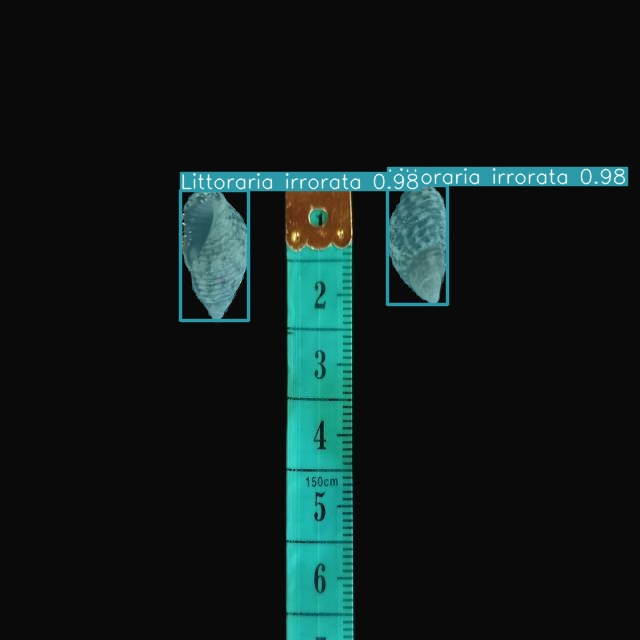

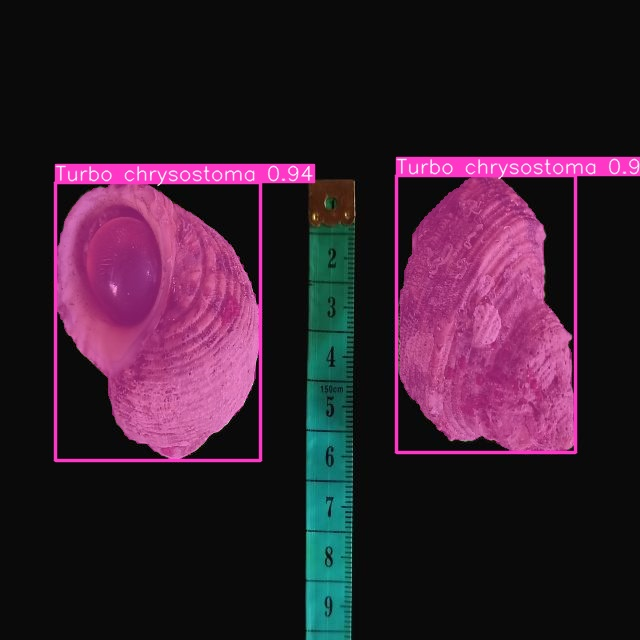

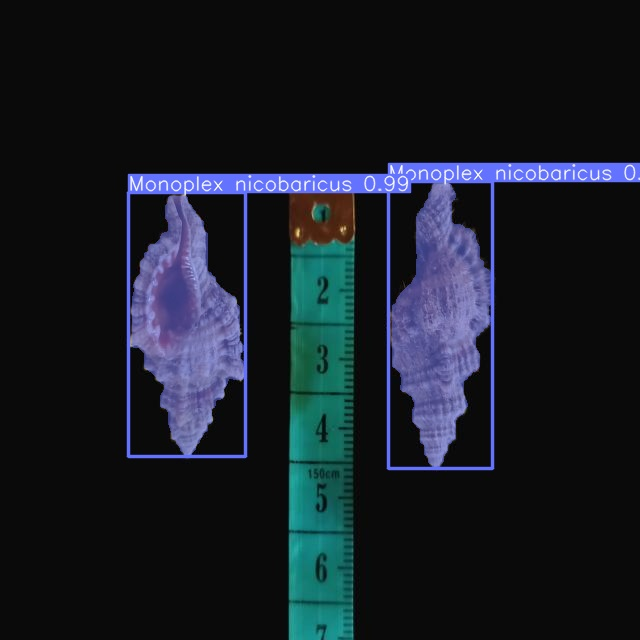

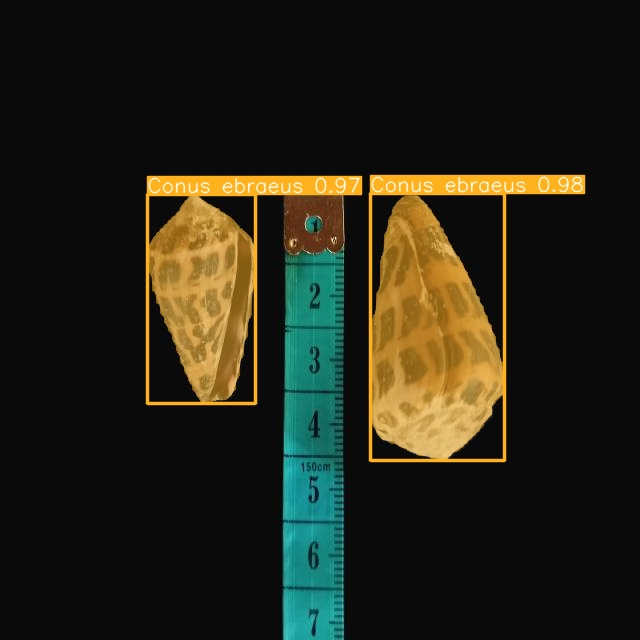

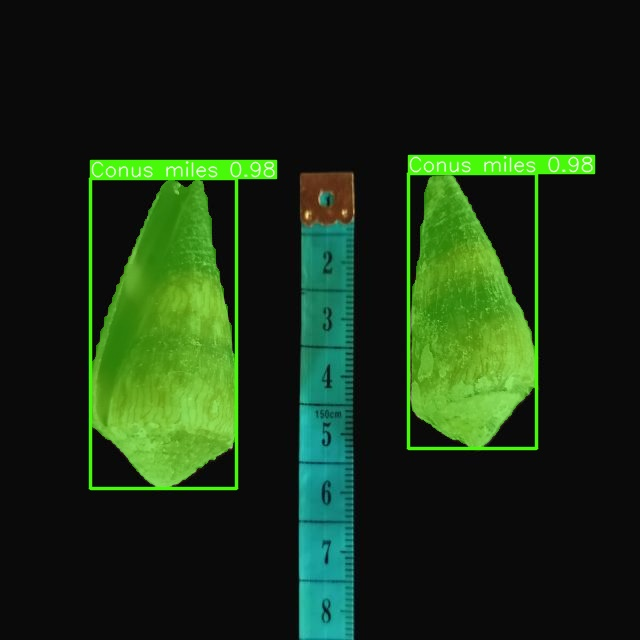

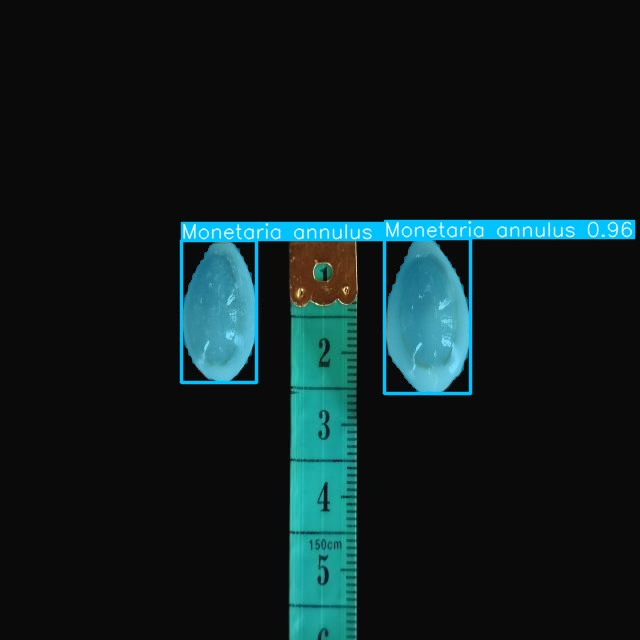

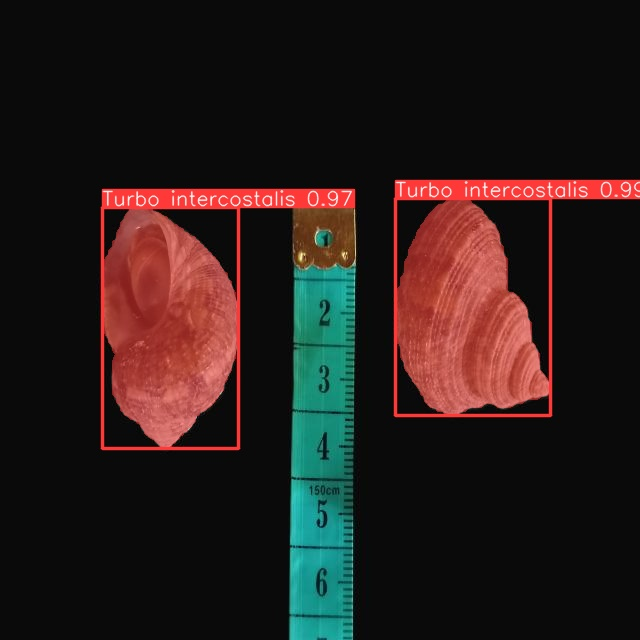

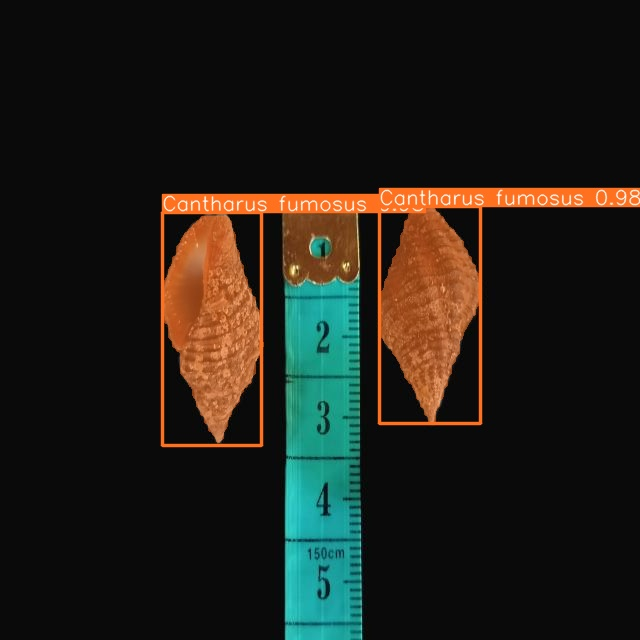

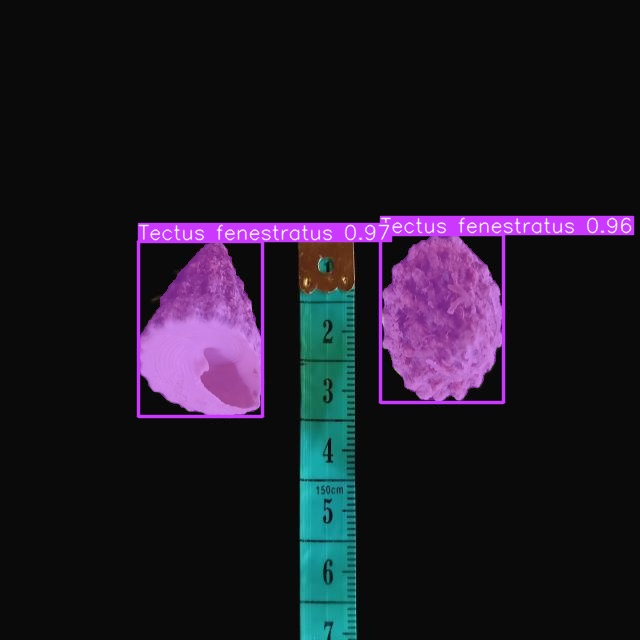

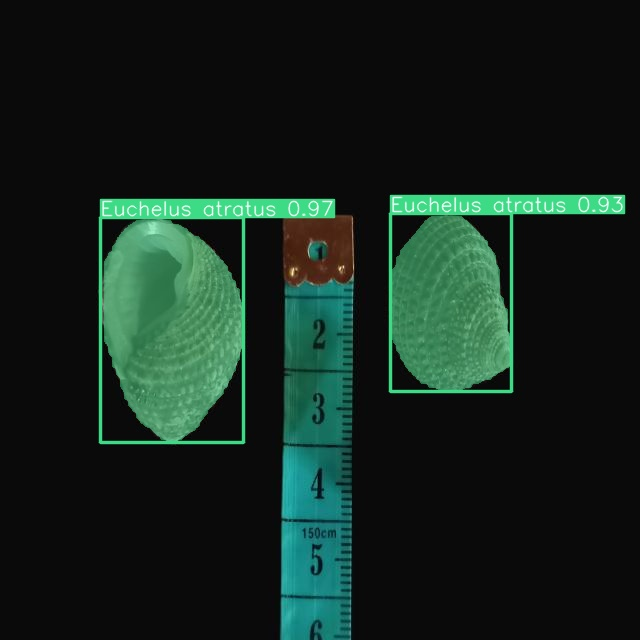

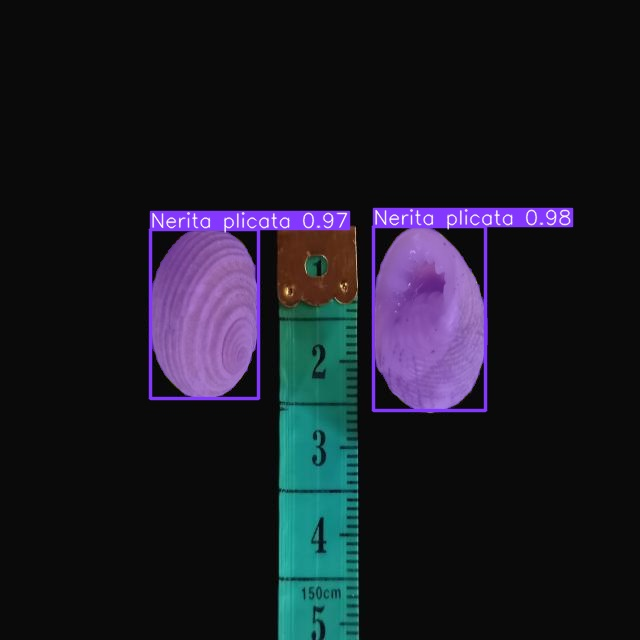

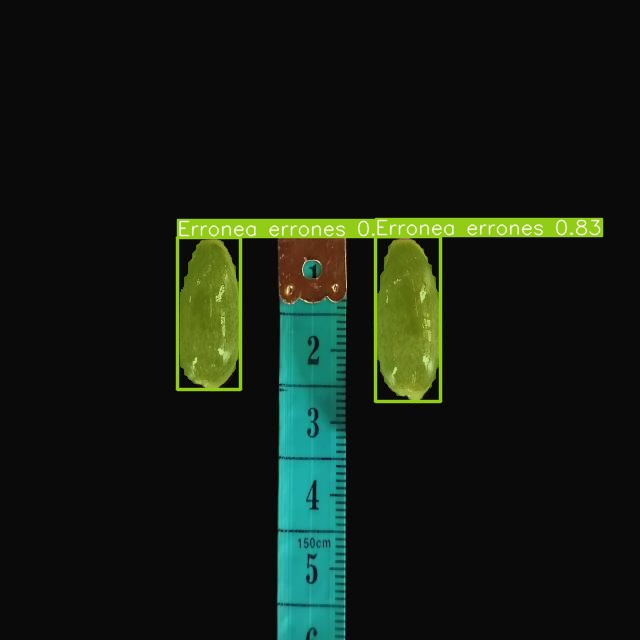

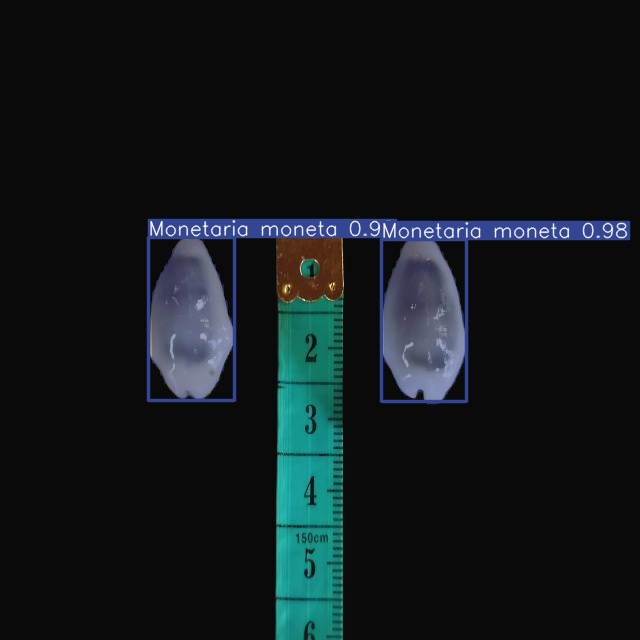

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")

**Save & Deploy Model**

In [23]:
#project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train2/")